# PROBLEM - Time Series Forecasting

You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales have been given to you from January 1980 to July 1995.

# Dataset - 1 - Shoesales

### Importing Basic Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from warnings import filterwarnings     
filterwarnings("ignore")

## Q 1.1)  Read the data as an appropriate Time Series data and plot the data.

In [3]:
df = pd.read_csv('Shoe-Sales.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [4]:
df1 = pd.read_csv('Shoe-Sales.csv',parse_dates=True,squeeze=True,index_col=0)

In [5]:
df.head()

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

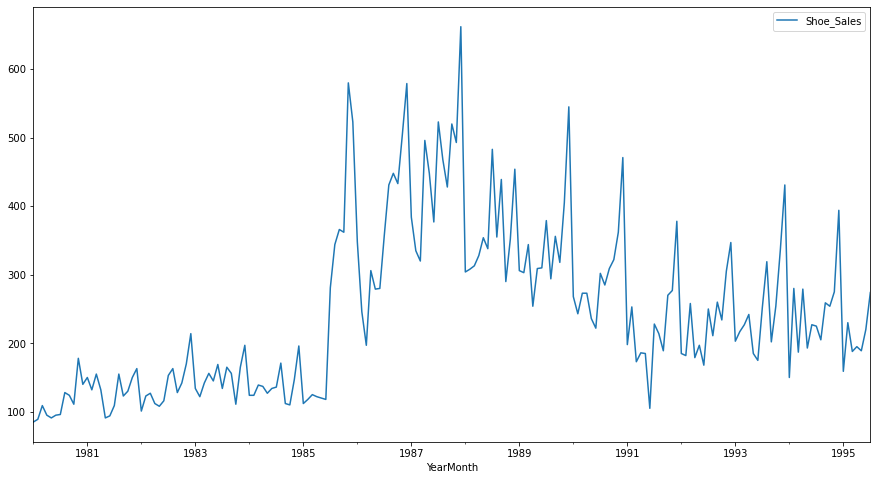

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
df.plot()
plt.show()

## Q1.2) Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [7]:
df.head()

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

In [8]:
df.dtypes

Shoe_Sales    int64
dtype: object

In [9]:
df.isnull().sum()

Shoe_Sales    0
dtype: int64

In [10]:
df.describe()

Shoe_Sales
count  187.000000
mean   245.636364
std    121.390804
min     85.000000
25%    143.500000
50%    220.000000
75%    315.500000
max    662.000000

### Plot a yearly boxplot for the shoe sales.

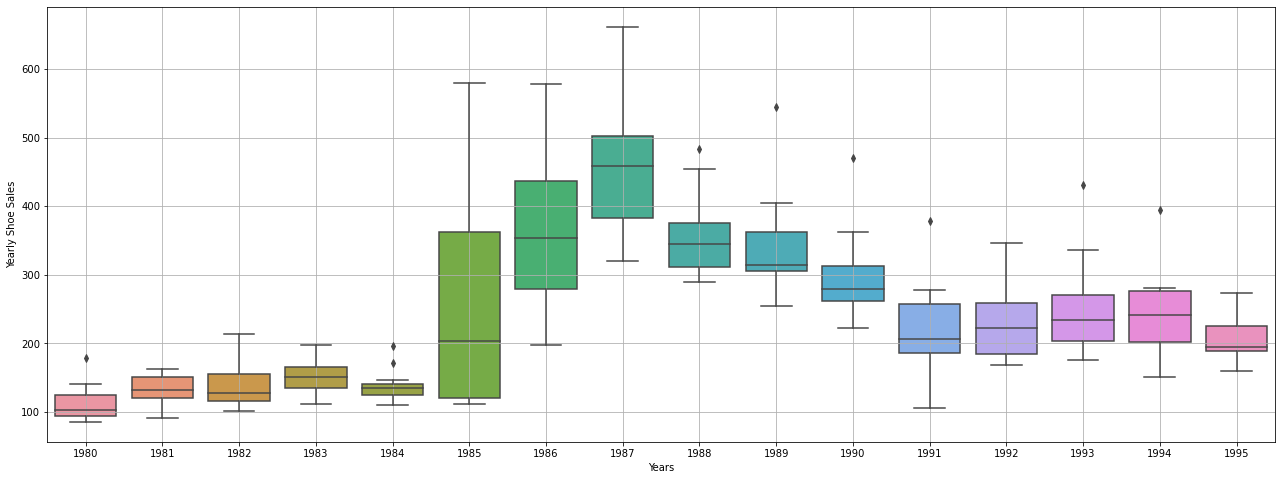

In [11]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df1.index.year, df1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Shoe Sales');

### Plot a monthly boxplot for the shoe sales taking all the years into account.

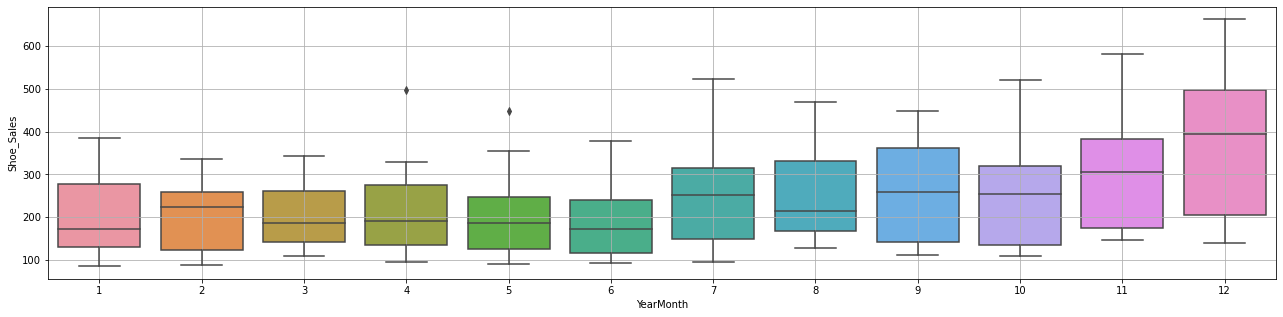

In [12]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df1.index.month, df1, ax=ax,whis=1.5)
plt.grid();

### Plot a monthplot of the give Time Series.

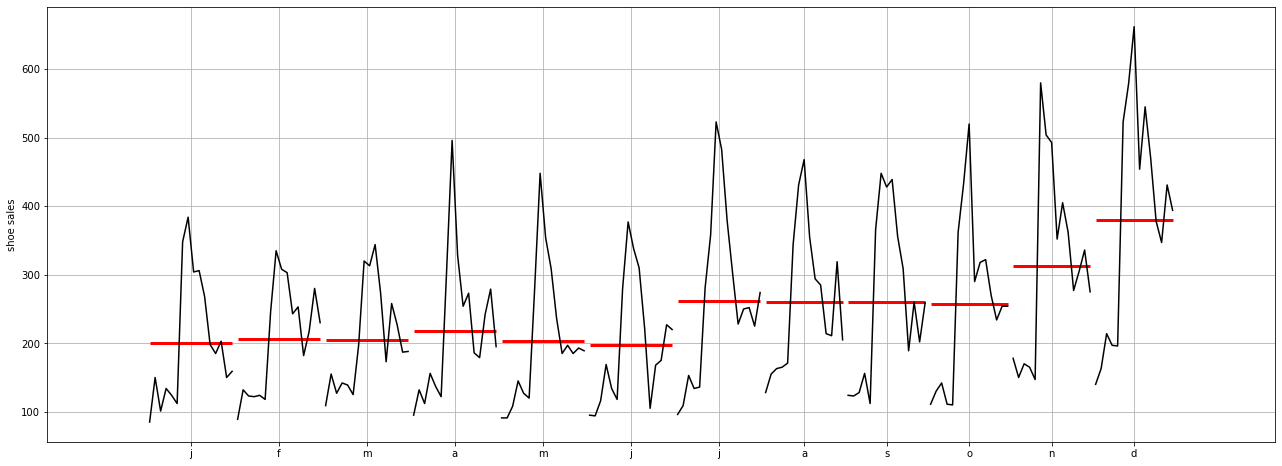

In [13]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df1,ylabel='shoe sales',ax=ax)
plt.grid();

In [14]:
df['Shoe_Sales']

YearMonth
1980-01-01     85
1980-02-01     89
1980-03-01    109
1980-04-01     95
1980-05-01     91
             ... 
1995-03-01    188
1995-04-01    195
1995-05-01    189
1995-06-01    220
1995-07-01    274
Name: Shoe_Sales, Length: 187, dtype: int64

In [15]:
yearly_sales_across_months = pd.pivot_table(df, values = 'Shoe_Sales', columns = df.index.month, 
                                        index = df.index.year)

yearly_sales_across_months

YearMonth     1      2      3      4      5      6      7      8      9   \
YearMonth                                                                  
1980        85.0   89.0  109.0   95.0   91.0   95.0   96.0  128.0  124.0   
1981       150.0  132.0  155.0  132.0   91.0   94.0  109.0  155.0  123.0   
1982       101.0  123.0  127.0  112.0  108.0  116.0  153.0  163.0  128.0   
1983       134.0  122.0  142.0  156.0  145.0  169.0  134.0  165.0  156.0   
1984       124.0  124.0  139.0  137.0  127.0  134.0  136.0  171.0  112.0   
1985       112.0  118.0  125.0  122.0  120.0  118.0  281.0  344.0  366.0   
1986       348.0  246.0  197.0  306.0  279.0  280.0  358.0  431.0  448.0   
1987       384.0  335.0  320.0  496.0  448.0  377.0  523.0  468.0  428.0   
1988       304.0  308.0  313.0  328.0  354.0  338.0  483.0  355.0  439.0   
1989       306.0  303.0  344.0  254.0  309.0  310.0  379.0  294.0  356.0   
1990       268.0  243.0  273.0  273.0  236.0  222.0  302.0  285.0  309.0   
1991       198.0  253.0  173.0  186.0  185.0  105.0  228.0  214.0  189.0   
1992       185.0  182.0  258.0  179.0  197.0  168.0  250.0  211.0  260.0   
1993       203.0  217.0  227.0  242.0  185.0  175.0  252.0  319.0  202.0   
1994       150.0  280.0  187.0  279.0  193.0  227.0  225.0  205.0  259.0   
1995       159.0  230.0  188.0  195.0  189.0  220.0  274.0    NaN    NaN   

YearMonth     10     11     12  
YearMonth                       
1980       111.0  178.0  140.0  
1981       130.0  150.0  163.0  
1982       142.0  170.0  214.0  
1983       111.0  165.0  197.0  
1984       110.0  147.0  196.0  
1985       362.0  580.0  523.0  
1986       433.0  504.0  579.0  
1987       520.0  493.0  662.0  
1988       290.0  352.0  454.0  
1989       318.0  405.0  545.0  
1990       322.0  362.0  471.0  
1991       270.0  277.0  378.0  
1992       234.0  305.0  347.0  
1993       254.0  336.0  431.0  
1994       254.0  275.0  394.0  
1995         NaN    NaN    NaN

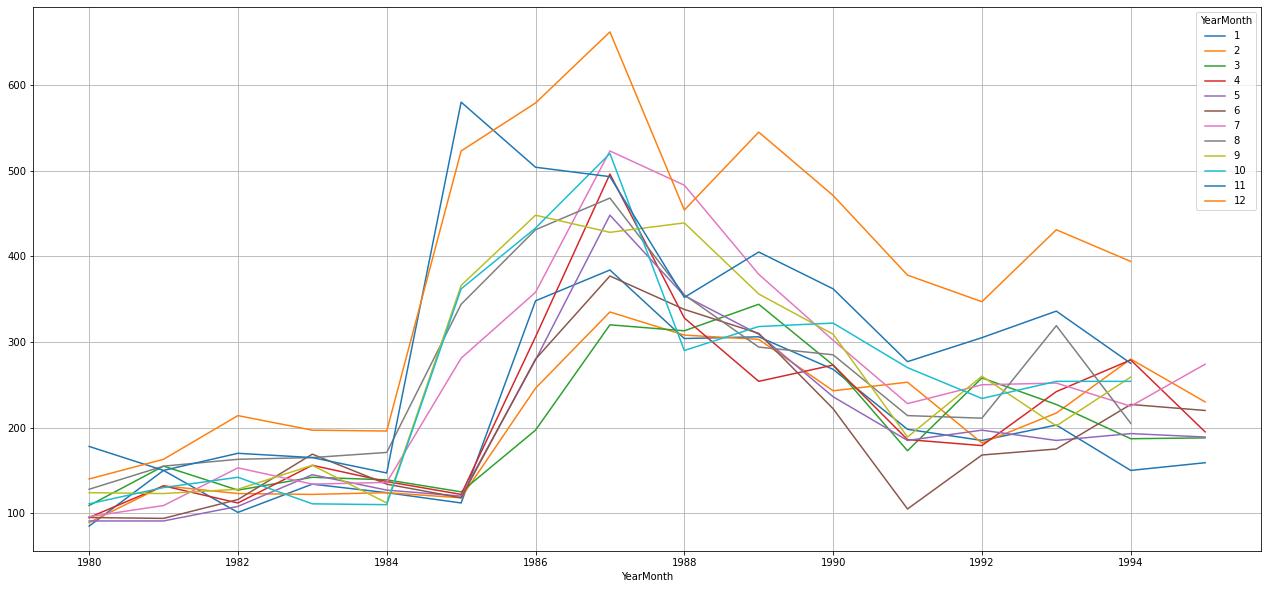

In [16]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

### Decompose the Time Series and plot the different components.

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### Additive Decomposition

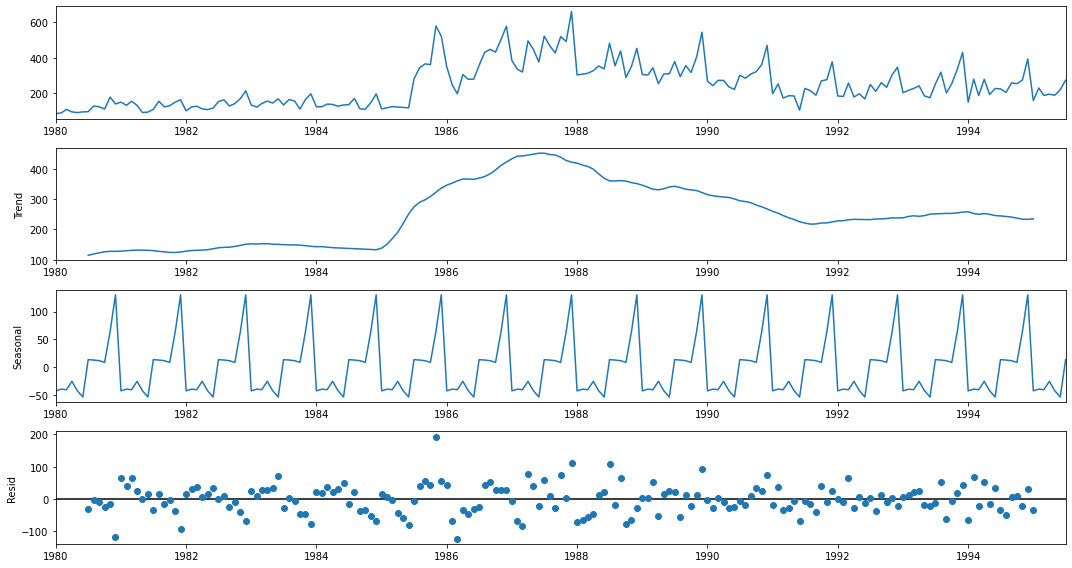

In [18]:
df_add_decompose = seasonal_decompose(df, model = 'additive')
df_add_decompose.plot()
plt.show()

In [19]:
trend = df_add_decompose.trend
seasonality = df_add_decompose.seasonal
residual = df_add_decompose.resid

print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -42.175463
1980-02-01   -39.062566
1980-03-01   -40.122090
1980-04-01   -25.092328
1980-05-01   -41.878042
                ...    
1995-03-01   -40.122090
1995-04-01   -25.092328
1995-05-01   -41.878042
1995-06-01   -53.208399
1995-07-01    13.741204
Name: seasonal, Length: 187, dtype: float64 

Residual 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64 



#### Multiplicative Decomposition

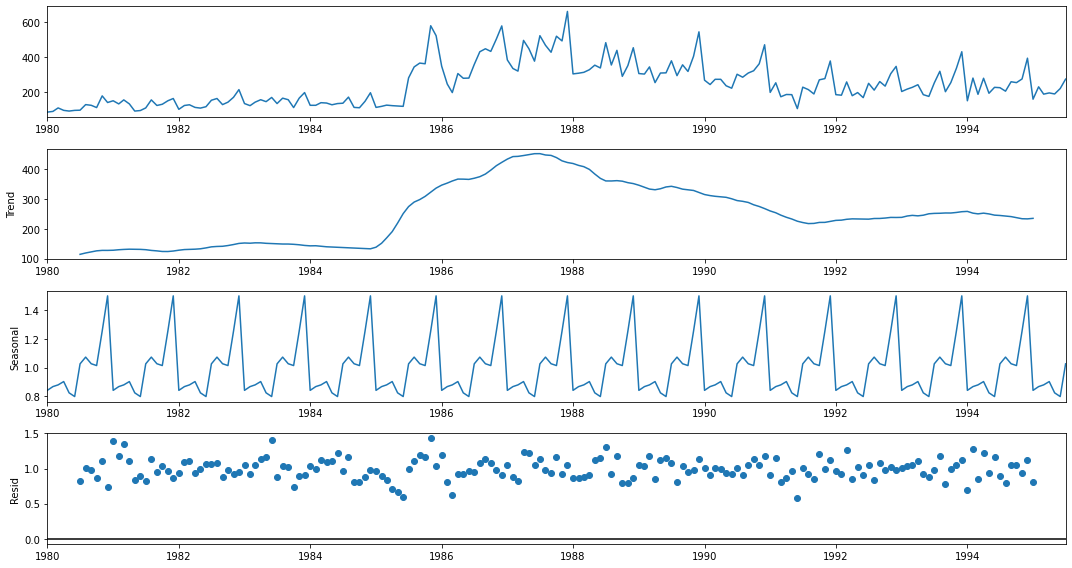

In [20]:
df_mul_decompose = seasonal_decompose(df, model = "multiplicative")
df_mul_decompose.plot()
plt.show()

In [21]:
trend = df_mul_decompose.trend
seasonality = df_mul_decompose.seasonal
residual = df_mul_decompose.resid

print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.840405
1980-02-01    0.866682
1980-03-01    0.878675
1980-04-01    0.901826
1980-05-01    0.823141
                ...   
1995-03-01    0.878675
1995-04-01    0.901826
1995-05-01    0.823141
1995-06-01    0.797254
1995-07-01    1.025527
Name: seasonal, Length: 187, dtype: float64 

Residual 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64 



## Q1.3) Split the data into training and test. The test data should start in 1991.

In [22]:
df.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

In [23]:
train = df[df.index<'1991'] 
test = df[df.index>='1991']

In [24]:
print('Shape of the Training Data: ',train.shape)
print('Shape of the Testing Data: ',test.shape)

Shape of the Training Data:  (132, 1)
Shape of the Testing Data:  (55, 1)


In [25]:
from IPython.display import display

In [26]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

Last few rows of Training Data


Shoe_Sales
YearMonth             
1990-08-01         285
1990-09-01         309
1990-10-01         322
1990-11-01         362
1990-12-01         471

First few rows of Test Data


Shoe_Sales
YearMonth             
1991-01-01         198
1991-02-01         253
1991-03-01         173
1991-04-01         186
1991-05-01         185

Last few rows of Test Data


Shoe_Sales
YearMonth             
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274

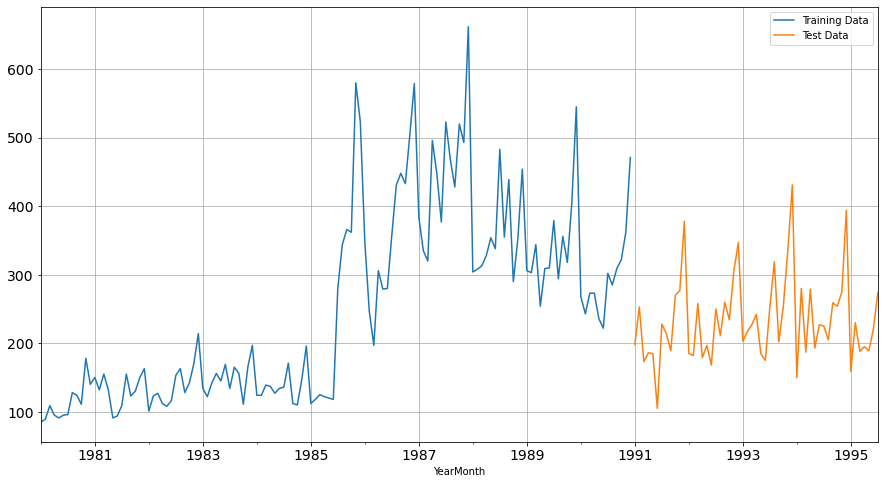

In [27]:
train['Shoe_Sales'].plot(fontsize=14)
test['Shoe_Sales'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Q1.4) Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Simple Exponential Smoothing

In [28]:
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as em

In [29]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

model_SES_autofit = model_SES.fit(optimized=True)

print('')
print('== Simple Exponential Smoothing Estimated Parameters ==')
print('')
model_SES_autofit.params


== Simple Exponential Smoothing Estimated Parameters ==



C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.605049221658923,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.83028430097019,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [30]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    420.229857
1991-02-01    420.229857
1991-03-01    420.229857
1991-04-01    420.229857
1991-05-01    420.229857
1991-06-01    420.229857
1991-07-01    420.229857
1991-08-01    420.229857
1991-09-01    420.229857
1991-10-01    420.229857
1991-11-01    420.229857
1991-12-01    420.229857
1992-01-01    420.229857
1992-02-01    420.229857
1992-03-01    420.229857
1992-04-01    420.229857
1992-05-01    420.229857
1992-06-01    420.229857
1992-07-01    420.229857
1992-08-01    420.229857
1992-09-01    420.229857
1992-10-01    420.229857
1992-11-01    420.229857
1992-12-01    420.229857
1993-01-01    420.229857
1993-02-01    420.229857
1993-03-01    420.229857
1993-04-01    420.229857
1993-05-01    420.229857
1993-06-01    420.229857
1993-07-01    420.229857
1993-08-01    420.229857
1993-09-01    420.229857
1993-10-01    420.229857
1993-11-01    420.229857
1993-12-01    420.229857
1994-01-01    420.229857
1994-02-01    420.229857
1994-03-01    420.229857
1994-04-01    420.229857


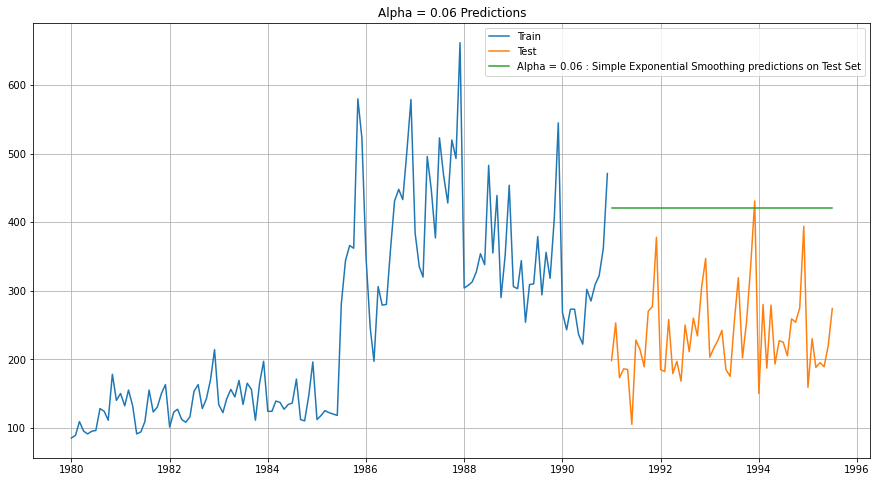

In [31]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha = 0.06 : Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.06 Predictions');

In [32]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

SES RMSE: 196.404836419672


In [33]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha = 0.06 : SES'])
resultsDf

Test RMSE
Alpha = 0.06 : SES  196.404836

### Model 2: Double Exponential Smoothing

In [34]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('== Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


== Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5948061323729839, 'smoothing_trend': 0.000279646480657923, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 82.93815017865691, 'initial_trend': 2.5254544148321547, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [35]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    422.870987
1991-02-01    425.397576
1991-03-01    427.924166
1991-04-01    430.450755
1991-05-01    432.977344
1991-06-01    435.503934
1991-07-01    438.030523
1991-08-01    440.557112
1991-09-01    443.083702
1991-10-01    445.610291
1991-11-01    448.136881
1991-12-01    450.663470
1992-01-01    453.190059
1992-02-01    455.716649
1992-03-01    458.243238
1992-04-01    460.769827
1992-05-01    463.296417
1992-06-01    465.823006
1992-07-01    468.349596
1992-08-01    470.876185
1992-09-01    473.402774
1992-10-01    475.929364
1992-11-01    478.455953
1992-12-01    480.982543
1993-01-01    483.509132
1993-02-01    486.035721
1993-03-01    488.562311
1993-04-01    491.088900
1993-05-01    493.615489
1993-06-01    496.142079
1993-07-01    498.668668
1993-08-01    501.195258
1993-09-01    503.721847
1993-10-01    506.248436
1993-11-01    508.775026
1993-12-01    511.301615
1994-01-01    513.828204
1994-02-01    516.354794
1994-03-01    518.881383
1994-04-01    521.407973


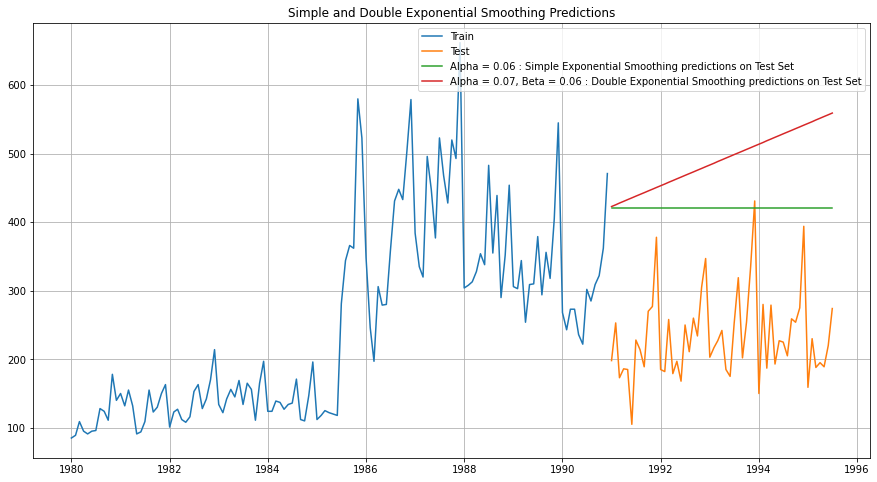

In [36]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha = 0.06 : Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha = 0.07, Beta = 0.06 : Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [37]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 266.16120808183047


In [38]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha = 0.07, Beta = 0.06 : DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.06 : SES               196.404836
Alpha = 0.07, Beta = 0.06 : DES  266.161208

### Model 3: Triple Exponential Smoothing (additive seasonality)

In [39]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('== Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



== Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5707142857142857, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.29372180451127816, 'damping_trend': nan, 'initial_level': 116.47499999999994, 'initial_trend': 1.6939393939394016, 'initial_seasons': array([-11.20138889, -14.06597222,   1.11111111,  -5.25347222,
       -21.42013889, -11.18055556, -10.83680556,  18.14236111,
        -2.53472222, -12.53472222,  28.90277778,  40.87152778]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [40]:
# Forecasting using this model for the duration of the test set
TES_predict_add =  model_TES.forecast(len(test))
TES_predict_add

1991-01-01    219.083658
1991-02-01    213.816321
1991-03-01    246.658224
1991-04-01    267.260236
1991-05-01    287.719744
1991-06-01    286.532259
1991-07-01    380.493545
1991-08-01    339.555860
1991-09-01    372.342545
1991-10-01    344.012031
1991-11-01    392.660570
1991-12-01    483.619562
1992-01-01    239.374793
1992-02-01    234.107456
1992-03-01    266.949358
1992-04-01    287.551371
1992-05-01    308.010879
1992-06-01    306.823393
1992-07-01    400.784679
1992-08-01    359.846995
1992-09-01    392.633680
1992-10-01    364.303165
1992-11-01    412.951705
1992-12-01    503.910697
1993-01-01    259.665928
1993-02-01    254.398590
1993-03-01    287.240493
1993-04-01    307.842506
1993-05-01    328.302014
1993-06-01    327.114528
1993-07-01    421.075814
1993-08-01    380.138129
1993-09-01    412.924815
1993-10-01    384.594300
1993-11-01    433.242840
1993-12-01    524.201832
1994-01-01    279.957063
1994-02-01    274.689725
1994-03-01    307.531628
1994-04-01    328.133640


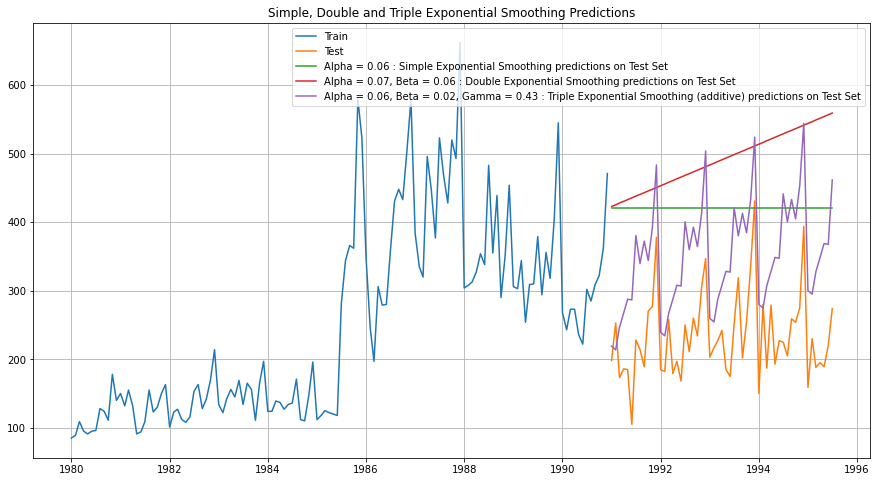

In [41]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha = 0.06 : Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha = 0.07, Beta = 0.06 : Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add, label='Alpha = 0.06, Beta = 0.02, Gamma = 0.43 : Triple Exponential Smoothing (additive) predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple, Double and Triple Exponential Smoothing Predictions');

In [42]:
print('TES_add RMSE:',mean_squared_error(test.values,TES_predict_add.values,squared=False))

TES_add RMSE: 128.99252592312354


In [43]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_add.values,squared=False)]}
                           ,index=['Alpha = 0.06, Beta = 0.02, Gamma = 0.43 : TES_add'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.06 : SES                                 196.404836
Alpha = 0.07, Beta = 0.06 : DES                    266.161208
Alpha = 0.06, Beta = 0.02, Gamma = 0.43 : TES_add  128.992526

### Model 4: Triple Exponential Smoothing (multiplicative seasonality)

In [44]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('== Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



== Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5711286329525818, 'smoothing_trend': 0.00014781930867568429, 'smoothing_seasonal': 0.20294733706077994, 'damping_trend': nan, 'initial_level': 116.35529208070726, 'initial_trend': 0.11219854465675648, 'initial_seasons': array([1.05679343, 1.01130311, 1.2337466 , 1.40663129, 1.32162715,
       1.07936886, 1.18018187, 1.50183082, 1.72369093, 1.4704132 ,
       1.75485304, 1.92101444]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [45]:
# Forecasting using this model for the duration of the test set
TES_predict_mul =  model_TES_am.forecast(len(test))
TES_predict_mul

1991-01-01    261.342543
1991-02-01    243.085370
1991-03-01    256.996702
1991-04-01    270.198135
1991-05-01    267.375606
1991-06-01    256.946321
1991-07-01    339.585163
1991-08-01    315.726553
1991-09-01    340.179286
1991-10-01    314.977543
1991-11-01    376.103895
1991-12-01    466.476288
1992-01-01    263.151144
1992-02-01    244.766655
1992-03-01    258.773180
1992-04-01    272.064791
1992-05-01    269.221701
1992-06-01    258.719386
1992-07-01    341.927133
1992-08-01    317.902729
1992-09-01    342.522659
1992-10-01    317.146066
1992-11-01    378.691770
1992-12-01    469.684153
1993-01-01    264.959745
1993-02-01    246.447939
1993-03-01    260.549657
1993-04-01    273.931448
1993-05-01    271.067795
1993-06-01    260.492451
1993-07-01    344.269103
1993-08-01    320.078906
1993-09-01    344.866033
1993-10-01    319.314589
1993-11-01    381.279644
1993-12-01    472.892017
1994-01-01    266.768347
1994-02-01    248.129224
1994-03-01    262.326135
1994-04-01    275.798104


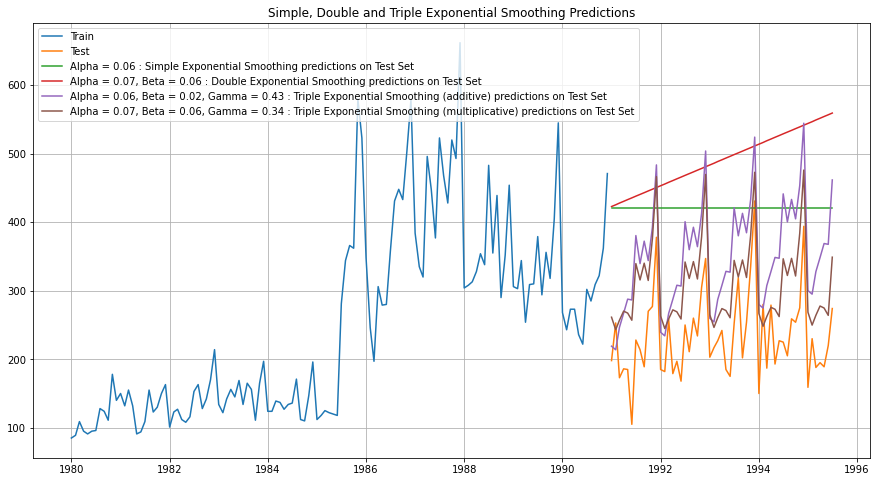

In [46]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha = 0.06 : Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha = 0.07, Beta = 0.06 : Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add, label='Alpha = 0.06, Beta = 0.02, Gamma = 0.43 : Triple Exponential Smoothing (additive) predictions on Test Set')
plt.plot(TES_predict_mul, label='Alpha = 0.07, Beta = 0.06, Gamma = 0.34 : Triple Exponential Smoothing (multiplicative) predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple, Double and Triple Exponential Smoothing Predictions');

In [47]:
print('TES_mul RMSE:',mean_squared_error(test.values,TES_predict_mul.values,squared=False))

TES_mul RMSE: 83.734048494837


In [48]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_mul.values,squared=False)]}
                           ,index=['Alpha = 0.07, Beta = 06, Gamma = 0.34 : TES_mul'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.06 : SES                                 196.404836
Alpha = 0.07, Beta = 0.06 : DES                    266.161208
Alpha = 0.06, Beta = 0.02, Gamma = 0.43 : TES_add  128.992526
Alpha = 0.07, Beta = 06, Gamma = 0.34 : TES_mul     83.734048

### Model 5: Linear Regression

For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [49]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [50]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [51]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Shoe_Sales  time
YearMonth                   
1980-01-01          85     1
1980-02-01          89     2
1980-03-01         109     3
1980-04-01          95     4
1980-05-01          91     5

Last few rows of Training Data


Shoe_Sales  time
YearMonth                   
1990-08-01         285   128
1990-09-01         309   129
1990-10-01         322   130
1990-11-01         362   131
1990-12-01         471   132

First few rows of Test Data


Shoe_Sales  time
YearMonth                   
1991-01-01         198   133
1991-02-01         253   134
1991-03-01         173   135
1991-04-01         186   136
1991-05-01         185   137

Last few rows of Test Data


Shoe_Sales  time
YearMonth                   
1995-03-01         188   183
1995-04-01         195   184
1995-05-01         189   185
1995-06-01         220   186
1995-07-01         274   187

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'])

LinearRegression()

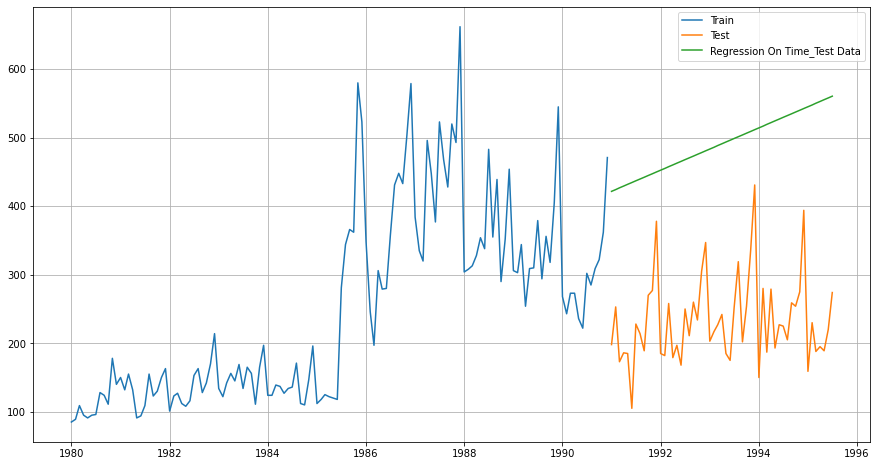

In [55]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [56]:
from sklearn import metrics

In [57]:
rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
print("For Regression Model on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For Regression Model on the Test Data,  RMSE is 266.276 


In [58]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Regression Model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.06 : SES                                 196.404836
Alpha = 0.07, Beta = 0.06 : DES                    266.161208
Alpha = 0.06, Beta = 0.02, Gamma = 0.43 : TES_add  128.992526
Alpha = 0.07, Beta = 06, Gamma = 0.34 : TES_mul     83.734048
Regression Model                                   266.276472

### Model 6: Naive

In [59]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [60]:
NaiveModel_test['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    471
1991-02-01    471
1991-03-01    471
1991-04-01    471
1991-05-01    471
Name: naive, dtype: int64

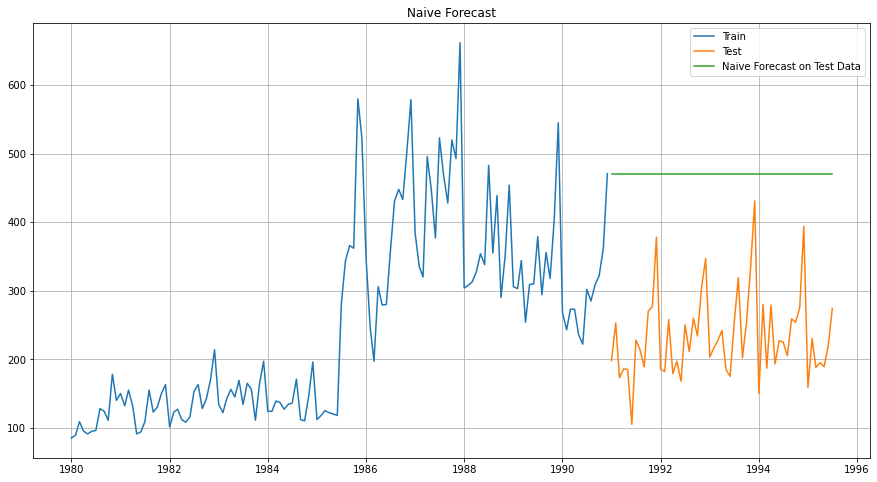

In [61]:
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [62]:
rmse_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],NaiveModel_test['naive'],squared=False)
print("For Naive Model on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive Model on the Test Data,  RMSE is 245.121


In [63]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Alpha = 0.06 : SES                                 196.404836
Alpha = 0.07, Beta = 0.06 : DES                    266.161208
Alpha = 0.06, Beta = 0.02, Gamma = 0.43 : TES_add  128.992526
Alpha = 0.07, Beta = 06, Gamma = 0.34 : TES_mul     83.734048
Regression Model                                   266.276472
Naive Model                                        245.121306

### Model 7: Simple Average

In [64]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [65]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

Shoe_Sales  mean_forecast
YearMonth                            
1991-01-01         198     250.575758
1991-02-01         253     250.575758
1991-03-01         173     250.575758
1991-04-01         186     250.575758
1991-05-01         185     250.575758

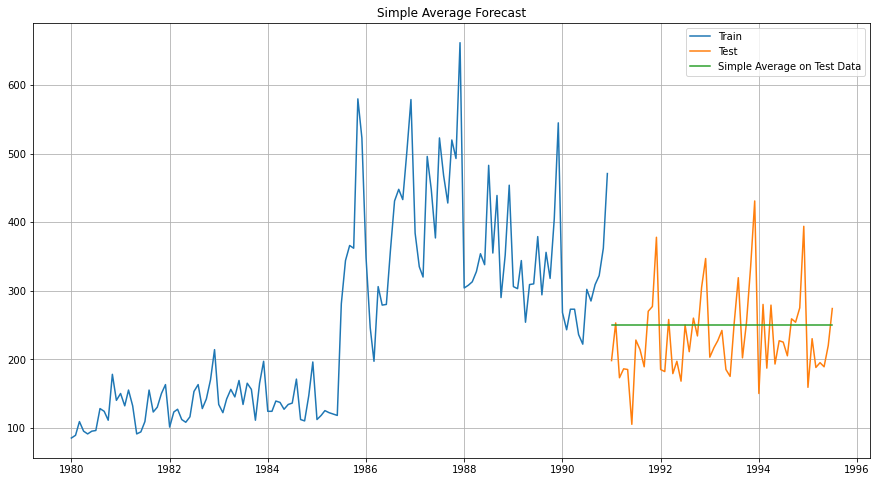

In [66]:
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [67]:
rmse_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 63.985


In [68]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Alpha = 0.06 : SES                                 196.404836
Alpha = 0.07, Beta = 0.06 : DES                    266.161208
Alpha = 0.06, Beta = 0.02, Gamma = 0.43 : TES_add  128.992526
Alpha = 0.07, Beta = 06, Gamma = 0.34 : TES_mul     83.734048
Regression Model                                   266.276472
Naive Model                                        245.121306
Simple Average Model                                63.984570

## Q1.5) Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check thenew data for stationarity and comment.Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [69]:
from statsmodels.tsa.stattools import adfuller

In [70]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.749
DF test p-value is 0.7287654522797273
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [71]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.181
DF test p-value is 0.0882258925591975
Number of lags used 13


Now, let us go ahead and plot the stationary series.

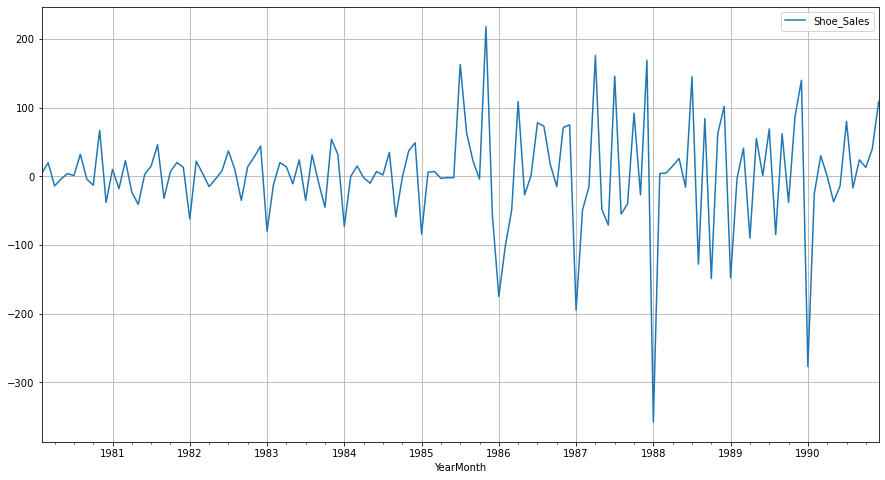

In [72]:
train.diff().dropna().plot(grid=True);

## Q1.6) Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

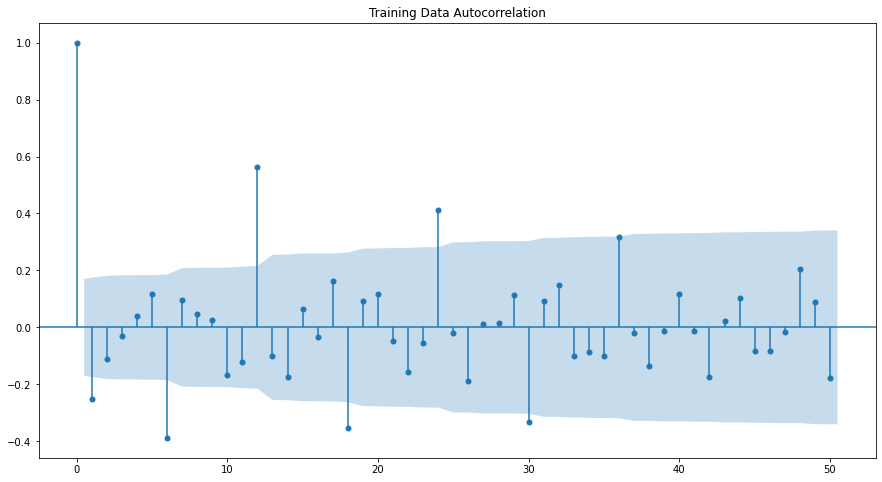

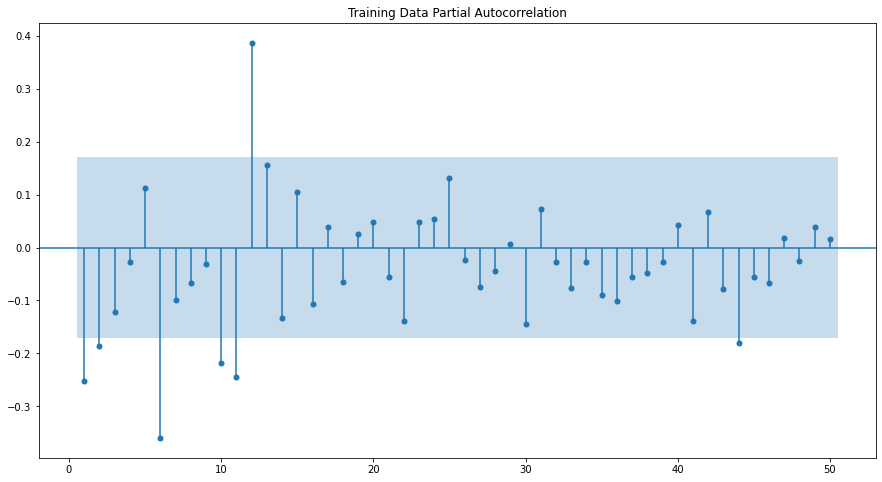

In [74]:
plot_acf(train.diff(),lags=50,title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),lags=50,title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [75]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [76]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [77]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1338.3663267373183
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1208.4142473347142
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:6760.719514639695
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1327.397051054789
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1312.586797868654
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1187.0843995009277
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3485.3557882904543
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1201.0600831567197
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1200.7545174421311
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1188.0396305010813


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:1816.9774436002158
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1071.7371393677754
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1073.5912665501537
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1074.3858105920735
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:6641.023817086549
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1476.016777738159
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1318.3861206387712
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1185.4842426144114


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:5482.194647141273
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1313.5738277003445
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1287.767566926055
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1164.2974585350237


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3842.9535872331685
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1188.1632556767752
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1188.2091371919228
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1165.8757060504017
SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:2138.516297247973
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1063.853591616078
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1064.9884940320233
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1065.4784220763884


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3891.755610507085
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1463.545127212094
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1308.3453006660623
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1177.0247487773727


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:6629.511997586769
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1315.5733347402775
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1279.6069439950597
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1156.1654292744483
SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2861.4329743386493
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1190.0663490436223
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1190.043633922402
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1157.7723133308014


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2762.1949409017116
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1065.799635659251
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1066.868250077703
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1067.2348348823539


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:4924.8428004787
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1453.3926745338024
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1295.6926502825502
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1165.19746401331


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:6562.625948295802
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1312.3375717570561
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1267.1211111182238
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1143.6879109002512


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3225.500189346096
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1188.2299003814217
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1187.616976921306
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1145.471564498987
SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:5747.210707564062
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1064.8145559442
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1066.0536870470964
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1066.4459262176972


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:2236.393873308585
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1491.1378318825623
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1331.4058144092062
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1197.56019401096
SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:6695.832745221714
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1303.2203127538976
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1296.8057138710703
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1173.38677181472


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:4111.274779099799
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1177.1656900229232
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1175.661933812436
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1175.0815891384505


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:2169.8537898403456
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1053.1265950753339
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1053.920029158907
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1053.1805332610522
SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:6691.296545575307
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1471.8669871771322
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1315.326191247057
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1186.003084241198


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:6698.180079630309
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1305.1955101698265
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1288.679501698264
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1165.1792553870132


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3327.535654037598
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1179.158364984704
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1177.6069139958486
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1166.9242913618662


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:2407.514248853292
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1055.1252199395226
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1055.8125293144753
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1055.0703093421857


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:1876.1901843770095
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1463.4445549649008
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1306.7163356175236
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1176.2946248378641


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:6631.501830883865
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1306.1946944647382
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1280.399489812533
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1157.0825892918697


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3581.7627941209475
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1180.6823652110195
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1179.6027992807542
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1158.7941776767195


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:4656.3313356858935
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1056.9262386787507
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1057.7183715235362
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1057.0130361986548


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:86.60701820919316
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1455.1227996405878
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1297.9909784306496
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1167.2864077004315


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:6398.730203350813
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1304.0159933150876
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1268.9081401663302
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1145.2364664232844
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3367.537131527225
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1179.8716548587943
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1178.3362488287753
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1147.0079741244704


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:5815.656845613675
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1056.1814874380884
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1056.4520953336485
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1055.8086455590037


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:6021.498747285009
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1477.9194683056446
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1331.935319374872
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1199.1019589233913


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:5384.9295124568725
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1295.2181640818887
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1288.6840148345916
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1175.3764824245443


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:4230.855130108832
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1169.12696766002
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1167.3639775017589
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1166.9191464401267


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:1650.6257238178878
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1045.02146230979
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1044.8866865019147
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1044.218944735335
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:6674.054310056115
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1473.8515321187883
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1316.7129215405876
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1185.519669009056


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:14.0
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1293.341995952903
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1289.2967410618612
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1166.1030148368036


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3686.857391813342
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1168.6663425966865
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1168.520870591986
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1167.676692296078
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:5871.430828193768
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1045.5602424877209
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1046.7173396251537
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1046.2045150722


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:6077.709715403399
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1464.1902793964016
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1308.2038016352685
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1176.4764240717282


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:6611.780570907878
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1293.3977262775063
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1279.6661104290138
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1158.490995796929


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3492.5699346598326
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1169.962731426411
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1170.0463664457775
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1158.6303243360749


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:1252.6337402098916
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1046.7224205845275
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1048.0035077254656
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1047.586819111747


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3246.500918413148
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1438.7608780659693
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1299.4342699381039
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1169.3674492597593
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:18.0
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1295.024284395051
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1270.770181338409
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1147.2099519745825


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3338.289087297048
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1171.3899151368744
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1170.334716950592
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1148.986522318447


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:5749.535325525112
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1047.9074110270822
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1048.4590768994021
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1047.6854732828815


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:985.7604733200569
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1467.4747263045615
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1330.5603607089
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1197.963313392633


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:5966.204572292509
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1284.184745558019
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1280.0127999460028
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1176.773970310542


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3674.286199863832
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1159.801733879625
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1159.0479224006597
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1158.4294432644847
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:1712.6376591901958
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1036.0673224572288
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1036.5454167274393
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1035.7107027237698
SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:6604.784675936969
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1465.3971811540857
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1318.5182357801407
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1189.5749954226342


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:16.0
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1283.586418982846
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1279.4496983656354
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1166.410730843308
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3224.373814451338
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1159.4465234939871
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1158.4875576793268
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1157.8123209664125


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:1960.9647485153625
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1035.9071127718112
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1036.998755636189
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1035.90987397122


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:22.0
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1465.6255973322468
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1308.860629889264
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1177.4468779236088
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:4690.264290437463
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1284.5907599159614
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1281.4454807115455
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1157.5249047813209
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:5575.780556304066
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1161.426710097368
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1159.8968429401284
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1159.3184756196351


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:1392.8512842100236
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1037.782889470184
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1038.7860574546185
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1037.6247413079711


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:4819.250492756424
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1438.0171053655147
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1297.0159326260036
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1168.6914084990651


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:108.3165230683834
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1286.682649466458
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1272.7409088082848
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1149.1427487252708
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:4500.859323255608
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1163.2881310681419
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1161.7217379673432
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1150.918912277846


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:2118.83440944396
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1039.5994157005036
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1040.2844176452832
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1039.2195201567897
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:26.0


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal   AIC
147  (2, 1, 1)  (0, 0, 3, 12)  14.0
211  (3, 1, 1)  (0, 0, 3, 12)  16.0
179  (2, 1, 3)  (0, 0, 3, 12)  18.0
223  (3, 1, 1)  (3, 0, 3, 12)  22.0
255  (3, 1, 3)  (3, 0, 3, 12)  26.0

In [81]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 3, 12),
                                #enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                         SARIMAX Results                                          
Dep. Variable:                                 Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(0, 0, [1, 2, 3], 12)   Log Likelihood               -2860.188
Date:                                    Thu, 16 Jun 2022   AIC                           5732.376
Time:                                            11:36:51   BIC                           5749.627
Sample:                                        01-01-1980   HQIC                          5739.386
                                             - 12-01-1990                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9889   4.04e-21   2.45e+20      0

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


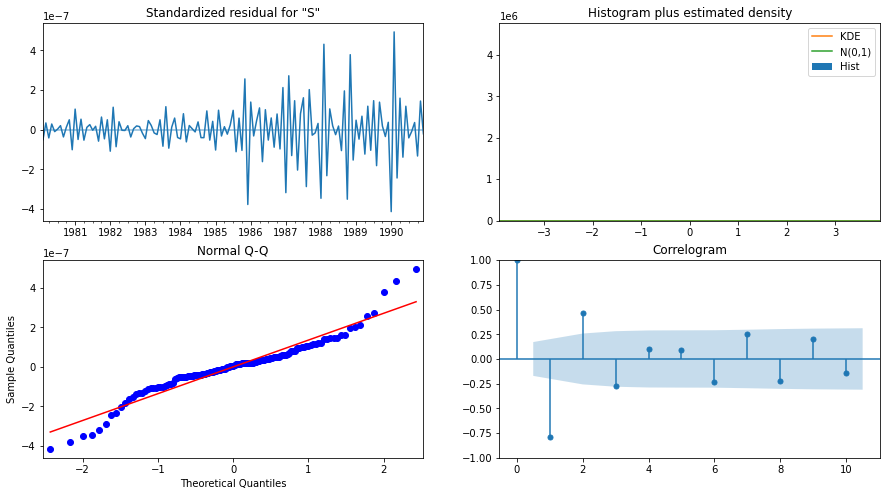

In [82]:
results_auto_SARIMA.plot_diagnostics();

In [83]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [84]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Shoe_Sales        mean       mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  270.055231  1.153145e+09  -2.260123e+09   2.260123e+09
1991-02-01  287.864338  3.125462e+09  -6.125793e+09   6.125794e+09
1991-03-01  311.111697  5.592017e+09  -1.096015e+10   1.096015e+10
1991-04-01  374.378069  8.461098e+09  -1.658345e+10   1.658345e+10
1991-05-01  384.280107  1.167416e+10  -2.288093e+10   2.288093e+10

In [85]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [86]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1512.1692810762256 
MAPE: 584.9162430955059


In [87]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA_Auto(1,1,1)(0,0,3,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Alpha = 0.06 : SES                                  196.404836
Alpha = 0.07, Beta = 0.06 : DES                     266.161208
Alpha = 0.06, Beta = 0.02, Gamma = 0.43 : TES_add   128.992526
Alpha = 0.07, Beta = 06, Gamma = 0.34 : TES_mul      83.734048
Regression Model                                    266.276472
Naive Model                                         245.121306
Simple Average Model                                 63.984570
SARIMA_Auto(1,1,1)(0,0,3,12)                       1512.169281

## Q1.7) Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

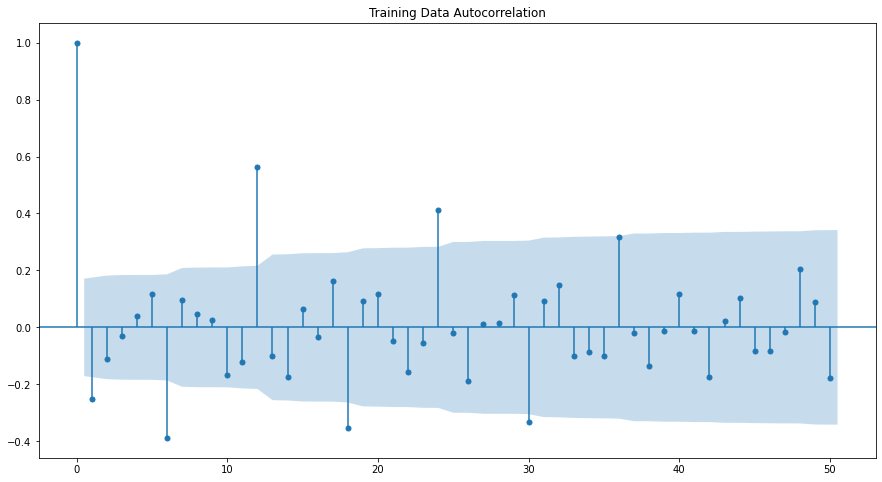

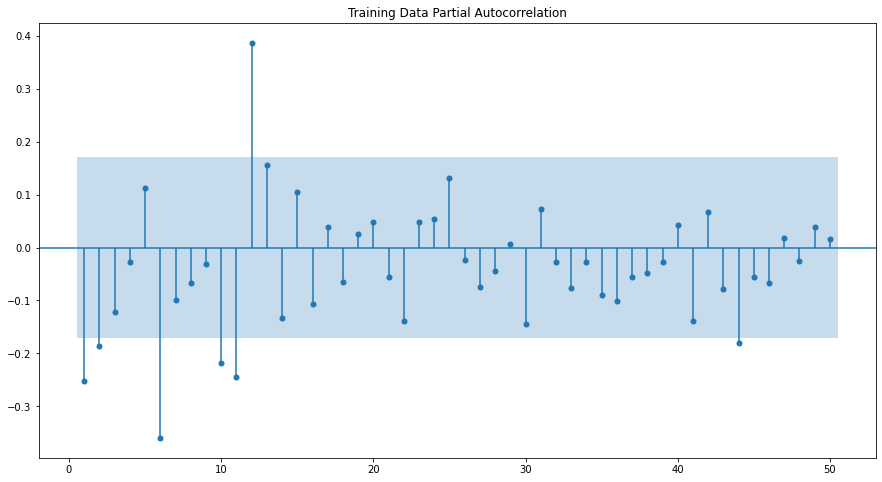

In [88]:
plot_acf(train.diff().dropna(),lags=50,title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),lags=50,title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [89]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(0,1,0),
                                seasonal_order=(0, 0, 12, 12),
                                #enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                                        SARIMAX Results                                                         
Dep. Variable:                                                               Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(0, 0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 12)   Log Likelihood                -718.744
Date:                                                                  Thu, 16 Jun 2022   AIC                           1463.488
Time:                                                                          11:37:39   BIC                           1500.866
Sample:                                                                      01-01-1980   HQIC                          1478.677
                                                                           - 12-01-1990                                         
Covariance Type:                                                                    opg          

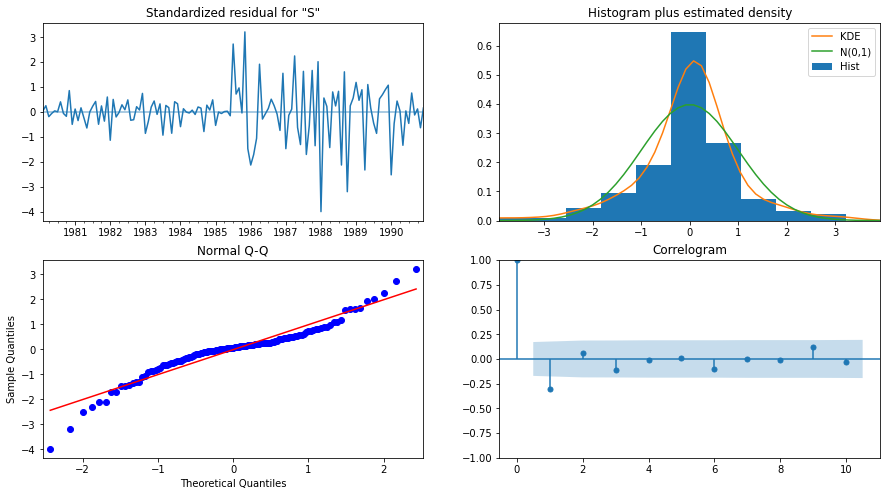

In [92]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [94]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [95]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 91.53438270942351 
MAPE: 31.502963661665124


In [96]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA_Manual(0,1,0)(0,0,12,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Alpha = 0.06 : SES                                  196.404836
Alpha = 0.07, Beta = 0.06 : DES                     266.161208
Alpha = 0.06, Beta = 0.02, Gamma = 0.43 : TES_add   128.992526
Alpha = 0.07, Beta = 06, Gamma = 0.34 : TES_mul      83.734048
Regression Model                                    266.276472
Naive Model                                         245.121306
Simple Average Model                                 63.984570
SARIMA_Auto(1,1,1)(0,0,3,12)                       1512.169281
SARIMA_Manual(0,1,0)(0,0,12,12)                      91.534383

## Q1.8) Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [97]:
resultsDf

Test RMSE
Alpha = 0.06 : SES                                  196.404836
Alpha = 0.07, Beta = 0.06 : DES                     266.161208
Alpha = 0.06, Beta = 0.02, Gamma = 0.43 : TES_add   128.992526
Alpha = 0.07, Beta = 06, Gamma = 0.34 : TES_mul      83.734048
Regression Model                                    266.276472
Naive Model                                         245.121306
Simple Average Model                                 63.984570
SARIMA_Auto(1,1,1)(0,0,3,12)                       1512.169281
SARIMA_Manual(0,1,0)(0,0,12,12)                      91.534383

## Q1.9) Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [98]:
full_data_model = ExponentialSmoothing(df,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
full_data_model = full_data_model.fit()

print('')
print('== Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(full_data_model.params)

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



== Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.4072309571087021, 'smoothing_trend': 0.03229263935904019, 'smoothing_seasonal': 0.22061599693785627, 'damping_trend': nan, 'initial_level': 123.79194018265252, 'initial_trend': -0.11837936617161127, 'initial_seasons': array([-41.72547063, -45.69189807, -25.68845247, -21.16373101,
       -30.07213165, -17.03805695,  10.49661784,  37.94128517,
        22.47110609,  12.80029182,  57.41106955,  47.57474517]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [99]:
final_predict =  full_data_model.forecast(steps=12)
final_predict

1995-08-01    272.210046
1995-09-01    281.079496
1995-10-01    291.919982
1995-11-01    340.654507
1995-12-01    430.914934
1996-01-01    202.802723
1996-02-01    243.650646
1996-03-01    211.624589
1996-04-01    228.216999
1996-05-01    204.476282
1996-06-01    209.893231
1996-07-01    273.613543
Freq: MS, dtype: float64

In [100]:
rmse = mean_squared_error(df['Shoe_Sales'],full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 52.554842406466456


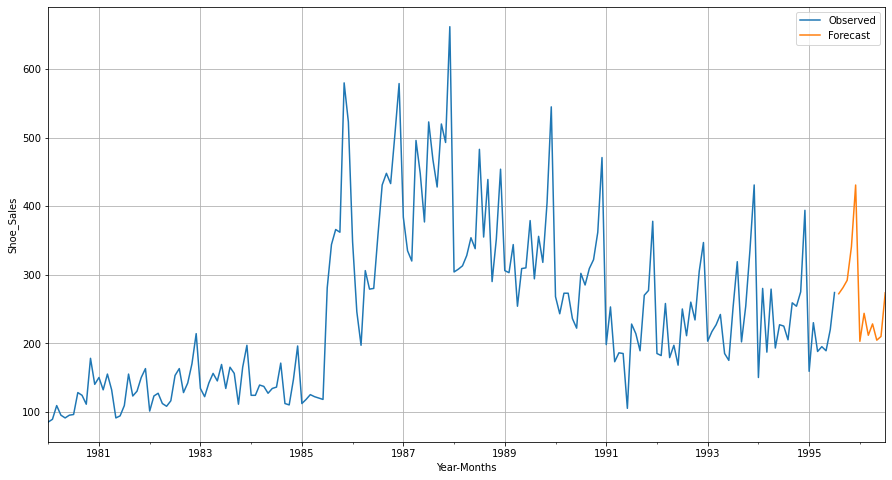

In [101]:
axis = df['Shoe_Sales'].plot(label='Observed')
final_predict.plot(ax=axis, label='Forecast')

axis.set_xlabel('Year-Months')
axis.set_ylabel('Shoe_Sales')
plt.legend(loc='best')
plt.grid();

# END OF PART-1

# PROBLEM - Time Series Forecasting

You are an analyst in the RST soft drink company and you are expected to forecast the sales of the production of the soft drink for the upcoming 12 months from where the data ends. The data for the production of soft drink has been given to you from January 1980 to July 1995.

# Dataset - 2 - SoftDrink

### Importing Basic Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from warnings import filterwarnings     
filterwarnings("ignore")

## Q 2.1)  Read the data as an appropriate Time Series data and plot the data.

In [3]:
df = pd.read_csv('SoftDrink.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [4]:
df1 = pd.read_csv('SoftDrink.csv',parse_dates=True,squeeze=True,index_col=0)

In [5]:
df.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

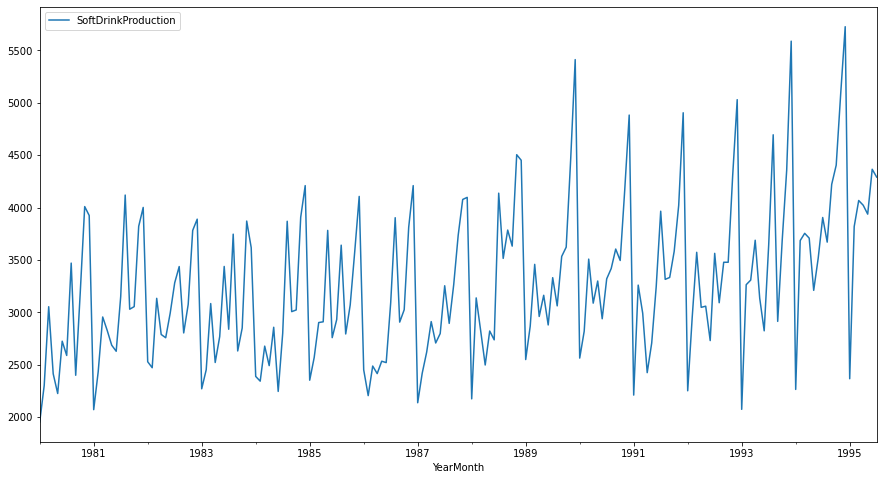

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
df.plot()
plt.show()

## Q2.2) Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [7]:
df.head()

SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

### Basic information check (data types, null value check & imputation, duplicates, etc.)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [9]:
df.dtypes

SoftDrinkProduction    int64
dtype: object

In [10]:
df.isnull().sum()

SoftDrinkProduction    0
dtype: int64

In [11]:
df = df.interpolate()

In [12]:
df.isnull().sum()

SoftDrinkProduction    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [14]:
df.describe()

SoftDrinkProduction
count           187.000000
mean           3262.609626
std             728.357367
min            1954.000000
25%            2748.000000
50%            3134.000000
75%            3741.000000
max            5725.000000

### Plot a yearly boxplot for the SoftDrink sales.

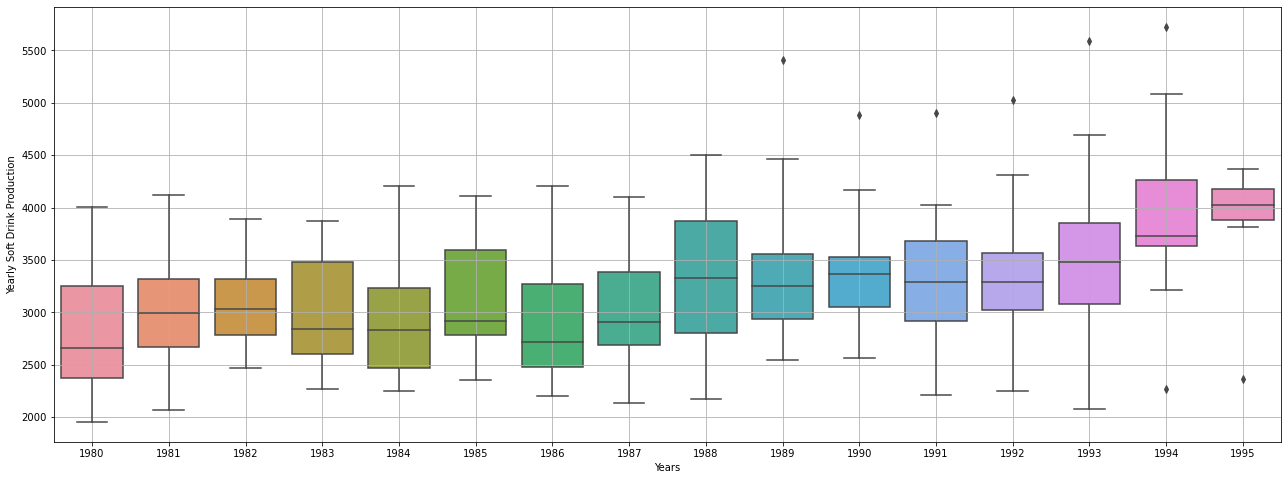

In [104]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df1.index.year, df1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Soft Drink Production');

### Plot a monthly boxplot for the beer production taking all the years into account.

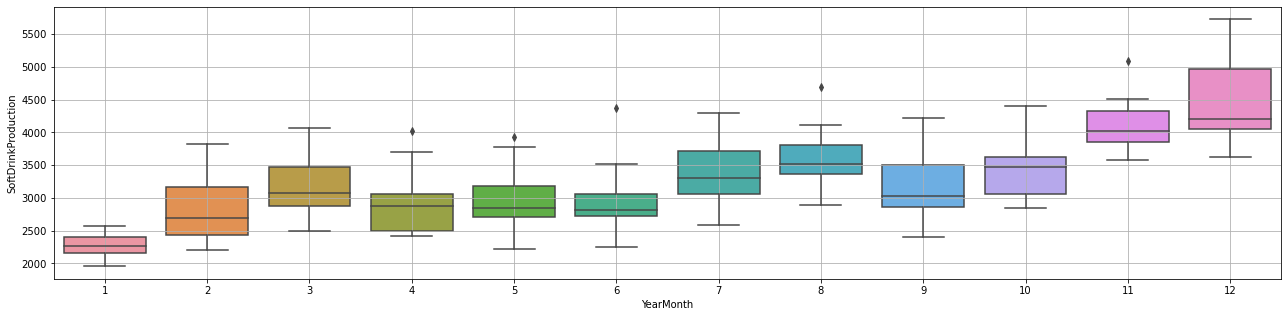

In [16]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df1.index.month, df1, ax=ax,whis=1.5)
plt.grid();

### Plot a monthplot of the give Time Series.

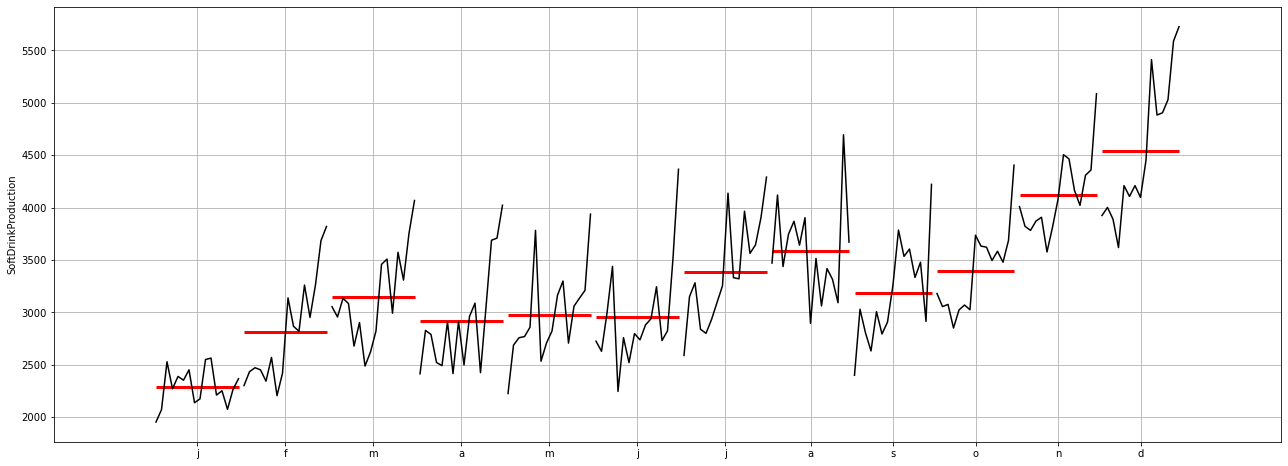

In [17]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df1,ylabel='SoftDrinkProduction',ax=ax)
plt.grid();

### Plot the Time Series according to different months for different years.¶

In [18]:
df['SoftDrinkProduction']

YearMonth
1980-01-01    1954
1980-02-01    2302
1980-03-01    3054
1980-04-01    2414
1980-05-01    2226
              ... 
1995-03-01    4067
1995-04-01    4022
1995-05-01    3937
1995-06-01    4365
1995-07-01    4290
Name: SoftDrinkProduction, Length: 187, dtype: int64

In [19]:
yearly_sales_across_months = pd.pivot_table(df, values = 'SoftDrinkProduction', columns = df.index.month, 
                                        index = df.index.year)

yearly_sales_across_months

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1954.0  2302.0  3054.0  2414.0  2226.0  2725.0  2589.0  3470.0   
1981       2072.0  2434.0  2956.0  2828.0  2687.0  2629.0  3150.0  4119.0   
1982       2529.0  2472.0  3134.0  2789.0  2758.0  2993.0  3282.0  3437.0   
1983       2271.0  2452.0  3084.0  2522.0  2769.0  3438.0  2839.0  3746.0   
1984       2389.0  2344.0  2678.0  2492.0  2858.0  2246.0  2800.0  3869.0   
1985       2353.0  2570.0  2903.0  2910.0  3782.0  2759.0  2931.0  3641.0   
1986       2452.0  2206.0  2488.0  2416.0  2534.0  2521.0  3093.0  3903.0   
1987       2138.0  2419.0  2622.0  2912.0  2708.0  2798.0  3254.0  2895.0   
1988       2175.0  3138.0  2823.0  2498.0  2822.0  2738.0  4137.0  3515.0   
1989       2550.0  2867.0  3458.0  2961.0  3163.0  2880.0  3331.0  3062.0   
1990       2564.0  2820.0  3508.0  3088.0  3299.0  2939.0  3320.0  3418.0   
1991       2211.0  3260.0  2992.0  2425.0  2707.0  3244.0  3965.0  3315.0   
1992       2252.0  2952.0  3573.0  3048.0  3059.0  2731.0  3563.0  3092.0   
1993       2075.0  3264.0  3308.0  3688.0  3136.0  2824.0  3644.0  4694.0   
1994       2265.0  3685.0  3754.0  3708.0  3210.0  3517.0  3905.0  3670.0   
1995       2367.0  3819.0  4067.0  4022.0  3937.0  4365.0  4290.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       2400.0  3180.0  4009.0  3924.0  
1981       3030.0  3055.0  3821.0  4001.0  
1982       2804.0  3076.0  3782.0  3889.0  
1983       2632.0  2851.0  3871.0  3618.0  
1984       3007.0  3023.0  3907.0  4209.0  
1985       2794.0  3070.0  3576.0  4106.0  
1986       2907.0  3025.0  3812.0  4209.0  
1987       3263.0  3736.0  4077.0  4097.0  
1988       3785.0  3632.0  4504.0  4451.0  
1989       3534.0  3622.0  4464.0  5411.0  
1990       3604.0  3495.0  4163.0  4882.0  
1991       3333.0  3583.0  4021.0  4904.0  
1992       3478.0  3478.0  4308.0  5029.0  
1993       2914.0  3686.0  4358.0  5587.0  
1994       4221.0  4404.0  5086.0  5725.0  
1995          NaN     NaN     NaN     NaN

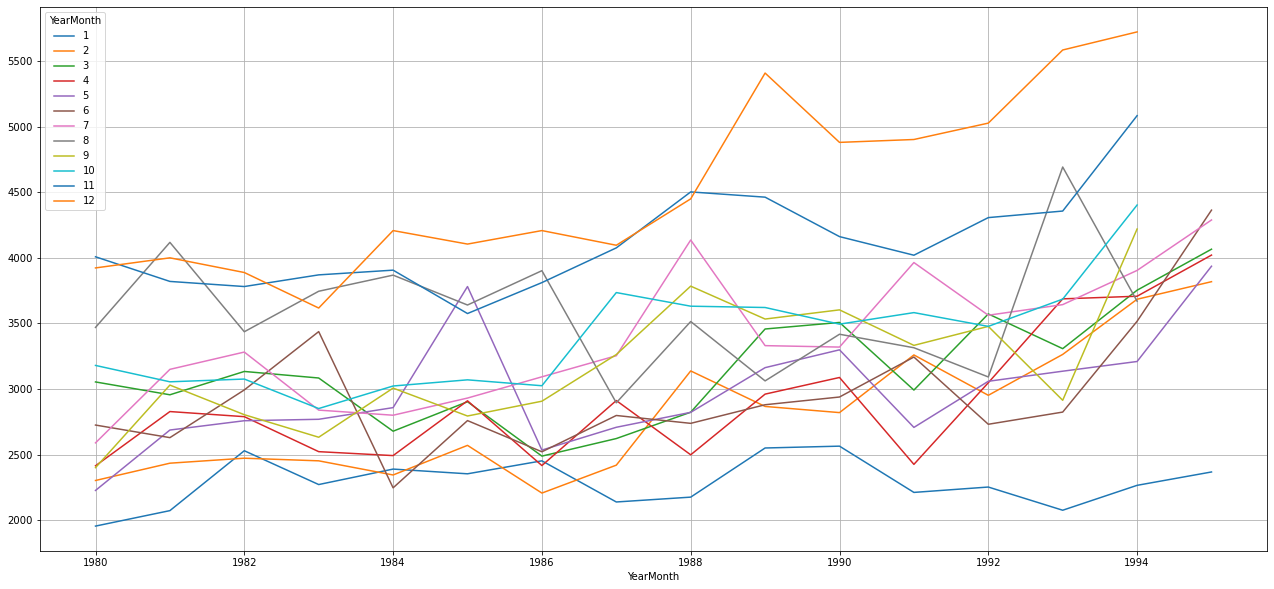

In [20]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

### Decompose the Time Series and plot the different components.

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### Additive Decomposition

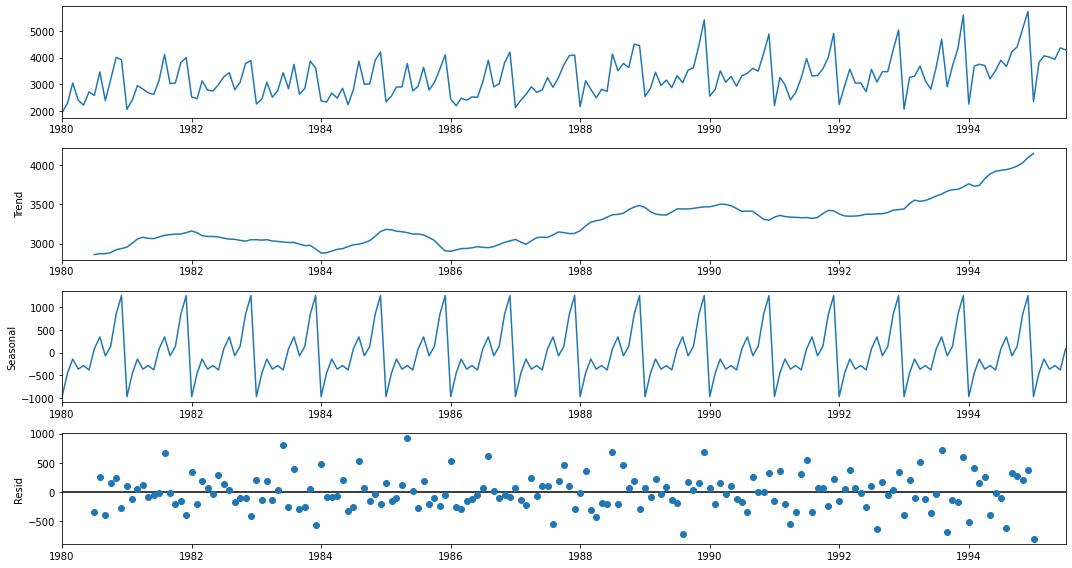

In [22]:
df_add_decompose = seasonal_decompose(df, model = 'additive')
df_add_decompose.plot()
plt.show()

In [23]:
trend = df_add_decompose.trend
seasonality = df_add_decompose.seasonal
residual = df_add_decompose.resid

print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -974.619692
1980-02-01   -451.246677
1980-03-01   -143.118700
1980-04-01   -366.181200
1980-05-01   -286.815129
                 ...    
1995-03-01   -143.118700
1995-04-01   -366.181200
1995-05-01   -286.815129
1995-06-01   -383.594891
1995-07-01     82.191419
Name: seasonal, Length: 187, dtype: float64 

Residual 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64 



#### Multiplicative Decomposition

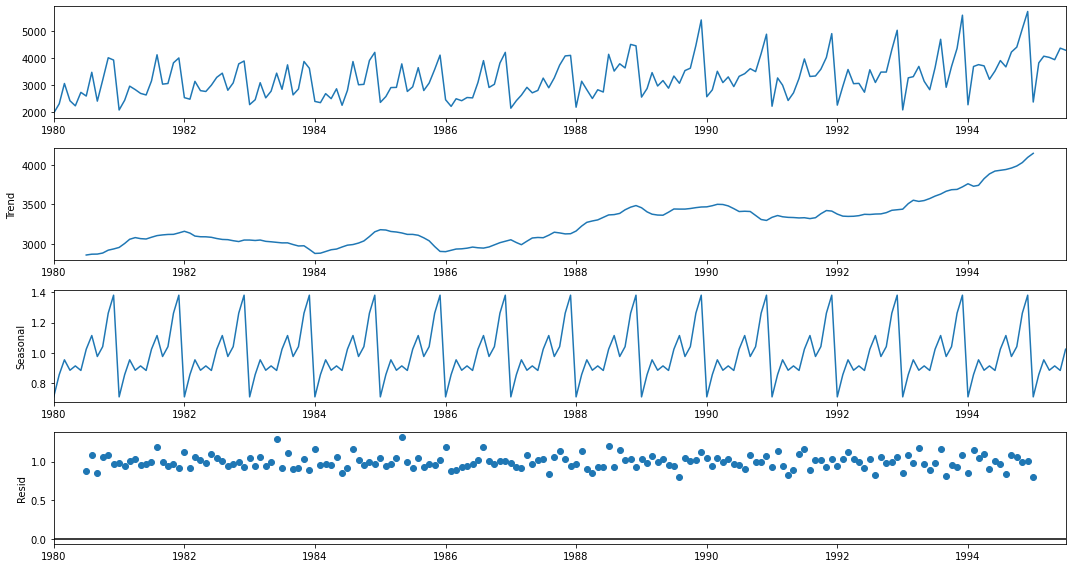

In [24]:
df_mul_decompose = seasonal_decompose(df, model = "multiplicative")
df_mul_decompose.plot()
plt.show()

In [25]:
trend = df_mul_decompose.trend
seasonality = df_mul_decompose.seasonal
residual = df_mul_decompose.resid

print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.709526
1980-02-01    0.856420
1980-03-01    0.953935
1980-04-01    0.885217
1980-05-01    0.913735
                ...   
1995-03-01    0.953935
1995-04-01    0.885217
1995-05-01    0.913735
1995-06-01    0.883890
1995-07-01    1.023936
Name: seasonal, Length: 187, dtype: float64 

Residual 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64 



## Q2.3) Split the data into training and test. The test data should start in 1991.

In [26]:
df.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

In [27]:
train = df[df.index<'1991'] 
test = df[df.index>='1991']

In [28]:
print('Shape of the Training Data: ',train.shape)
print('Shape of the Testing Data: ',test.shape)

Shape of the Training Data:  (132, 1)
Shape of the Testing Data:  (55, 1)


In [29]:
from IPython.display import display

In [30]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226

Last few rows of Training Data


SoftDrinkProduction
YearMonth                      
1990-08-01                 3418
1990-09-01                 3604
1990-10-01                 3495
1990-11-01                 4163
1990-12-01                 4882

First few rows of Test Data


SoftDrinkProduction
YearMonth                      
1991-01-01                 2211
1991-02-01                 3260
1991-03-01                 2992
1991-04-01                 2425
1991-05-01                 2707

Last few rows of Test Data


SoftDrinkProduction
YearMonth                      
1995-03-01                 4067
1995-04-01                 4022
1995-05-01                 3937
1995-06-01                 4365
1995-07-01                 4290

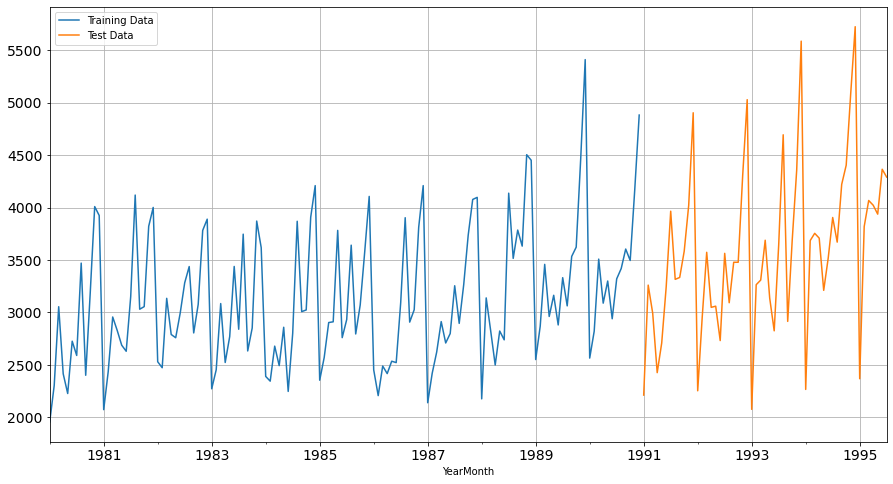

In [31]:
train['SoftDrinkProduction'].plot(fontsize=14)
test['SoftDrinkProduction'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Q2.4) Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,na? forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Simple Exponential Smoothing

In [32]:
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as em

In [33]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

model_SES_autofit = model_SES.fit(optimized=True)

print('')
print('== Simple Exponential Smoothing Estimated Parameters ==')
print('')
model_SES_autofit.params


== Simple Exponential Smoothing Estimated Parameters ==



C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.11907309094689855,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2573.0166666666655,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [34]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    3656.847753
1991-02-01    3656.847753
1991-03-01    3656.847753
1991-04-01    3656.847753
1991-05-01    3656.847753
1991-06-01    3656.847753
1991-07-01    3656.847753
1991-08-01    3656.847753
1991-09-01    3656.847753
1991-10-01    3656.847753
1991-11-01    3656.847753
1991-12-01    3656.847753
1992-01-01    3656.847753
1992-02-01    3656.847753
1992-03-01    3656.847753
1992-04-01    3656.847753
1992-05-01    3656.847753
1992-06-01    3656.847753
1992-07-01    3656.847753
1992-08-01    3656.847753
1992-09-01    3656.847753
1992-10-01    3656.847753
1992-11-01    3656.847753
1992-12-01    3656.847753
1993-01-01    3656.847753
1993-02-01    3656.847753
1993-03-01    3656.847753
1993-04-01    3656.847753
1993-05-01    3656.847753
1993-06-01    3656.847753
1993-07-01    3656.847753
1993-08-01    3656.847753
1993-09-01    3656.847753
1993-10-01    3656.847753
1993-11-01    3656.847753
1993-12-01    3656.847753
1994-01-01    3656.847753
1994-02-01    3656.847753
1994-03-01  

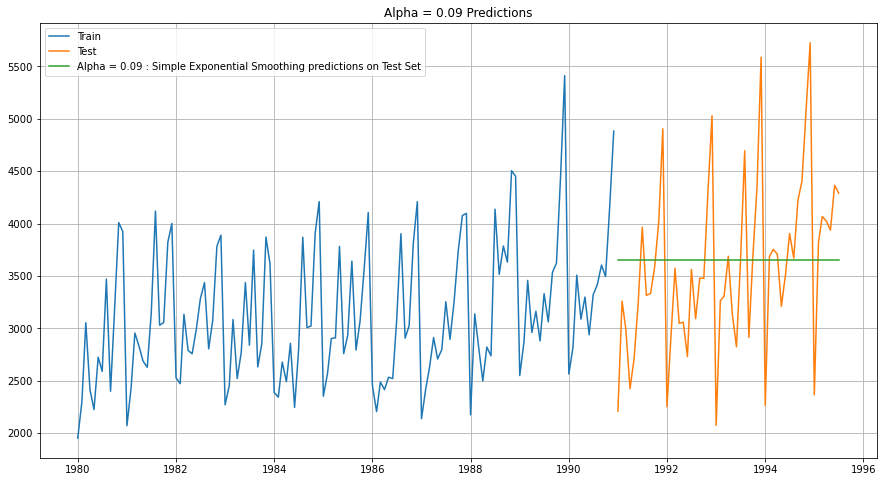

In [35]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha = 0.09 : Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09 Predictions');

In [36]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

SES RMSE: 809.5016403931278


In [37]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha = 0.09 : SES'])
resultsDf

Test RMSE
Alpha = 0.09 : SES  809.50164

### Model 2: Double Exponential Smoothing

In [38]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('== Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


== Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1242286864966588, 'smoothing_trend': 0.10769076164072929, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 2142.9200400852947, 'initial_trend': 42.27465415028941, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [39]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    3727.184397
1991-02-01    3751.450885
1991-03-01    3775.717372
1991-04-01    3799.983860
1991-05-01    3824.250348
1991-06-01    3848.516836
1991-07-01    3872.783323
1991-08-01    3897.049811
1991-09-01    3921.316299
1991-10-01    3945.582787
1991-11-01    3969.849274
1991-12-01    3994.115762
1992-01-01    4018.382250
1992-02-01    4042.648738
1992-03-01    4066.915225
1992-04-01    4091.181713
1992-05-01    4115.448201
1992-06-01    4139.714689
1992-07-01    4163.981176
1992-08-01    4188.247664
1992-09-01    4212.514152
1992-10-01    4236.780640
1992-11-01    4261.047127
1992-12-01    4285.313615
1993-01-01    4309.580103
1993-02-01    4333.846591
1993-03-01    4358.113078
1993-04-01    4382.379566
1993-05-01    4406.646054
1993-06-01    4430.912541
1993-07-01    4455.179029
1993-08-01    4479.445517
1993-09-01    4503.712005
1993-10-01    4527.978492
1993-11-01    4552.244980
1993-12-01    4576.511468
1994-01-01    4600.777956
1994-02-01    4625.044443
1994-03-01  

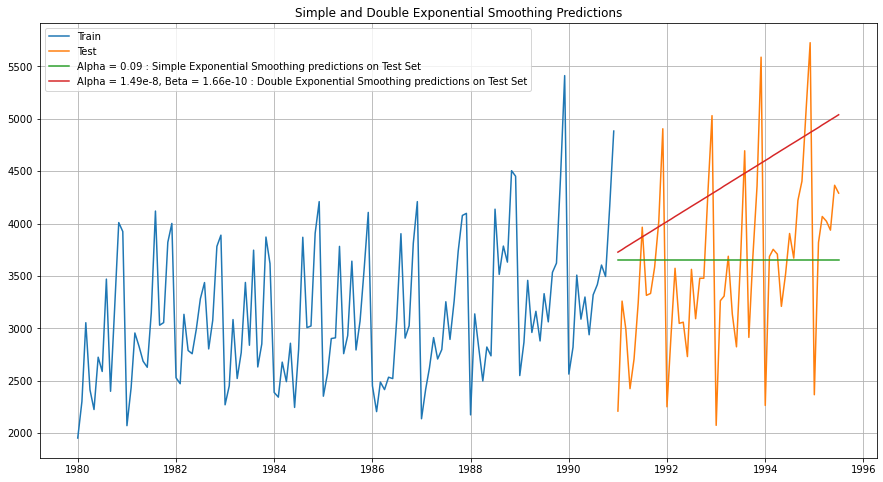

In [40]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha = 0.09 : Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha = 1.49e-8, Beta = 1.66e-10 : Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [41]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 1074.3291531501832


In [42]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha = 1.49e-8, Beta = 1.66e-10 : DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.09 : SES                       809.501640
Alpha = 1.49e-8, Beta = 1.66e-10 : DES  1074.329153

### Model 3: Triple Exponential Smoothing (additive seasonality)

In [43]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('== Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



== Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.14628214287204402, 'smoothing_trend': 0.03985523474431963, 'smoothing_seasonal': 0.2624197351602548, 'damping_trend': nan, 'initial_level': 2803.214611111109, 'initial_trend': 7.179638888889087, 'initial_seasons': array([-687.29896528, -582.87175694,  -55.66104861, -365.74079861,
       -253.26738194, -196.41738194,  -32.54725694,  690.31611806,
       -282.20021528,   44.75545139,  867.40386806,  853.53236806]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [44]:
# Forecasting using this model for the duration of the test set
TES_predict_add =  model_TES.forecast(len(test))
TES_predict_add

1991-01-01    2573.415543
1991-02-01    2891.897210
1991-03-01    3287.593195
1991-04-01    2999.142548
1991-05-01    3206.039305
1991-06-01    3006.265950
1991-07-01    3541.746047
1991-08-01    3623.036399
1991-09-01    3615.247075
1991-10-01    3664.034781
1991-11-01    4383.017533
1991-12-01    4761.313125
1992-01-01    2626.715237
1992-02-01    2945.196904
1992-03-01    3340.892889
1992-04-01    3052.442242
1992-05-01    3259.338999
1992-06-01    3059.565644
1992-07-01    3595.045740
1992-08-01    3676.336093
1992-09-01    3668.546769
1992-10-01    3717.334475
1992-11-01    4436.317227
1992-12-01    4814.612818
1993-01-01    2680.014931
1993-02-01    2998.496597
1993-03-01    3394.192583
1993-04-01    3105.741935
1993-05-01    3312.638693
1993-06-01    3112.865338
1993-07-01    3648.345434
1993-08-01    3729.635787
1993-09-01    3721.846463
1993-10-01    3770.634169
1993-11-01    4489.616921
1993-12-01    4867.912512
1994-01-01    2733.314625
1994-02-01    3051.796291
1994-03-01  

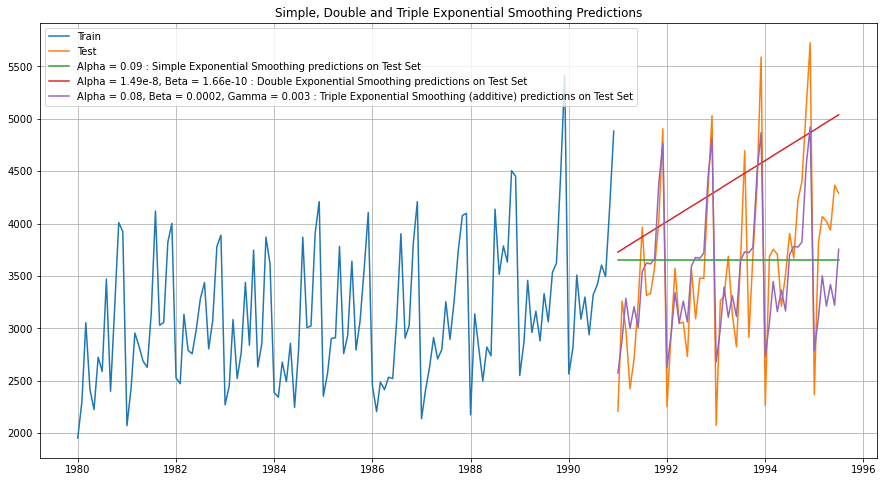

In [45]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha = 0.09 : Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha = 1.49e-8, Beta = 1.66e-10 : Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add, label='Alpha = 0.08, Beta = 0.0002, Gamma = 0.003 : Triple Exponential Smoothing (additive) predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple, Double and Triple Exponential Smoothing Predictions');

In [46]:
print('TES_add RMSE:',mean_squared_error(test.values,TES_predict_add.values,squared=False))

TES_add RMSE: 458.9653920540907


In [47]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_add.values,squared=False)]}
                           ,index=['Alpha = 0.08, Beta = 0.0002, Gamma = 0.003 : TES_add'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.09 : SES                                   809.501640
Alpha = 1.49e-8, Beta = 1.66e-10 : DES              1074.329153
Alpha = 0.08, Beta = 0.0002, Gamma = 0.003 : TE...   458.965392

### Model 4: Triple Exponential Smoothing (multiplicative seasonality)

In [48]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('== Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



== Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11128429736328378, 'smoothing_trend': 0.04947326762762311, 'smoothing_seasonal': 0.23037194388521623, 'damping_trend': nan, 'initial_level': 2803.0168193984414, 'initial_trend': 10.486286228443715, 'initial_seasons': array([0.80284001, 0.86968748, 1.08266033, 0.93954787, 0.96331944,
       0.98854326, 1.0654188 , 1.28504436, 1.0083707 , 1.0929922 ,
       1.36460606, 1.41709466]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [49]:
# Forecasting using this model for the duration of the test set
TES_predict_mul =  model_TES_am.forecast(len(test))
TES_predict_mul

1991-01-01    2564.869242
1991-02-01    2887.850537
1991-03-01    3300.056912
1991-04-01    3007.348662
1991-05-01    3213.743610
1991-06-01    3020.085798
1991-07-01    3573.891809
1991-08-01    3716.166910
1991-09-01    3598.070539
1991-10-01    3680.517441
1991-11-01    4458.769326
1991-12-01    4868.950881
1992-01-01    2605.675007
1992-02-01    2933.733938
1992-03-01    3352.420293
1992-04-01    3055.004505
1992-05-01    3264.602921
1992-06-01    3067.817416
1992-07-01    3630.301883
1992-08-01    3774.745594
1992-09-01    3654.713240
1992-10-01    3738.382153
1992-11-01    4528.777911
1992-12-01    4945.299961
1993-01-01    2646.480772
1993-02-01    2979.617340
1993-03-01    3404.783674
1993-04-01    3102.660348
1993-05-01    3315.462232
1993-06-01    3115.549035
1993-07-01    3686.711956
1993-08-01    3833.324277
1993-09-01    3711.355941
1993-10-01    3796.246865
1993-11-01    4598.786495
1993-12-01    5021.649041
1994-01-01    2687.286537
1994-02-01    3025.500741
1994-03-01  

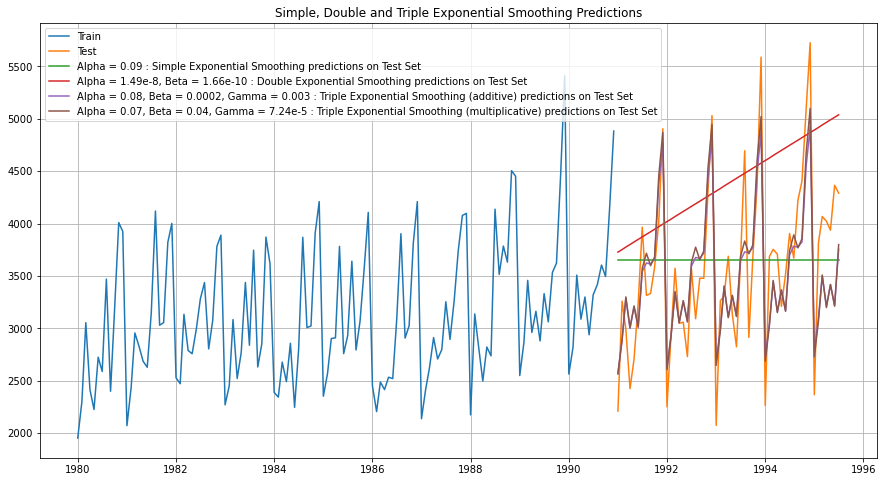

In [50]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha = 0.09 : Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha = 1.49e-8, Beta = 1.66e-10 : Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add, label='Alpha = 0.08, Beta = 0.0002, Gamma = 0.003 : Triple Exponential Smoothing (additive) predictions on Test Set')
plt.plot(TES_predict_mul, label='Alpha = 0.07, Beta = 0.04, Gamma = 7.24e-5 : Triple Exponential Smoothing (multiplicative) predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple, Double and Triple Exponential Smoothing Predictions');

In [51]:
print('TES_mul RMSE:',mean_squared_error(test.values,TES_predict_mul.values,squared=False))

TES_mul RMSE: 447.7225807439294


In [52]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_mul.values,squared=False)]}
                           ,index=['Alpha = 0.07, Beta = 0.04, Gamma = 7.24e-5 : TES_mul'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.09 : SES                                   809.501640
Alpha = 1.49e-8, Beta = 1.66e-10 : DES              1074.329153
Alpha = 0.08, Beta = 0.0002, Gamma = 0.003 : TE...   458.965392
Alpha = 0.07, Beta = 0.04, Gamma = 7.24e-5 : TE...   447.722581

### Model 5: Linear Regression

In [53]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [54]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [55]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


SoftDrinkProduction  time
YearMonth                            
1980-01-01                 1954     1
1980-02-01                 2302     2
1980-03-01                 3054     3
1980-04-01                 2414     4
1980-05-01                 2226     5

Last few rows of Training Data


SoftDrinkProduction  time
YearMonth                            
1990-08-01                 3418   128
1990-09-01                 3604   129
1990-10-01                 3495   130
1990-11-01                 4163   131
1990-12-01                 4882   132

First few rows of Test Data


SoftDrinkProduction  time
YearMonth                            
1991-01-01                 2211   133
1991-02-01                 3260   134
1991-03-01                 2992   135
1991-04-01                 2425   136
1991-05-01                 2707   137

Last few rows of Test Data


SoftDrinkProduction  time
YearMonth                            
1995-03-01                 4067   183
1995-04-01                 4022   184
1995-05-01                 3937   185
1995-06-01                 4365   186
1995-07-01                 4290   187

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'])

LinearRegression()

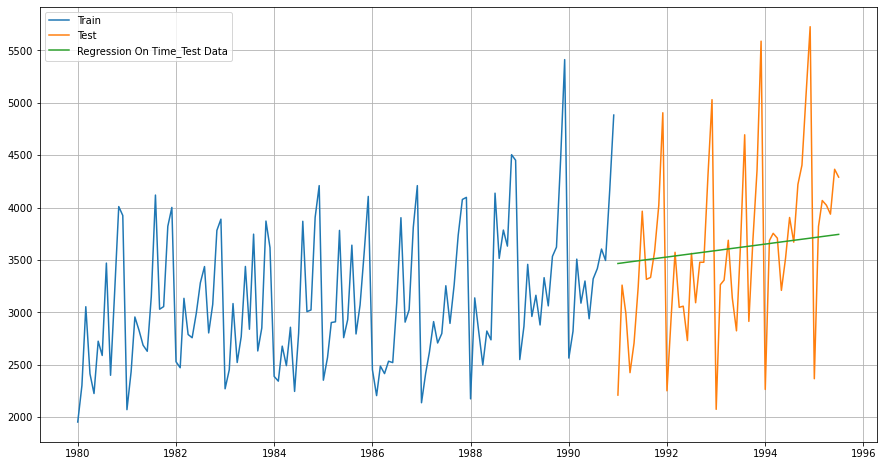

In [59]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [60]:
from sklearn import metrics

In [61]:
rmse_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1,squared=False)
print("For Regression Model on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For Regression Model on the Test Data,  RMSE is 775.808 


In [62]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Regression Model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.09 : SES                                   809.501640
Alpha = 1.49e-8, Beta = 1.66e-10 : DES              1074.329153
Alpha = 0.08, Beta = 0.0002, Gamma = 0.003 : TE...   458.965392
Alpha = 0.07, Beta = 0.04, Gamma = 7.24e-5 : TE...   447.722581
Regression Model                                     775.807810

### Model 6: Naive

In [63]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [64]:
NaiveModel_test['naive'] = np.asarray(train['SoftDrinkProduction'])[len(np.asarray(train['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    4882
1991-02-01    4882
1991-03-01    4882
1991-04-01    4882
1991-05-01    4882
Name: naive, dtype: int64

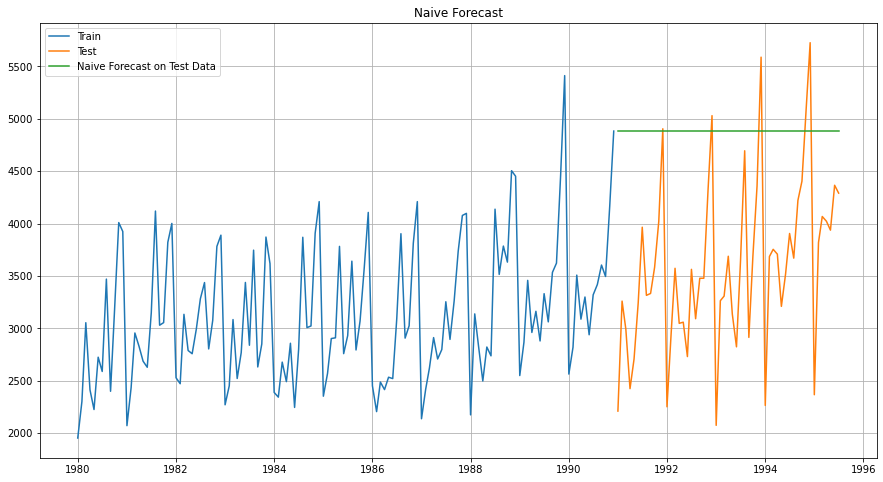

In [65]:
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [66]:
rmse_model2_test = metrics.mean_squared_error(test['SoftDrinkProduction'],NaiveModel_test['naive'],squared=False)
print("For Naive model on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive model on the Test Data,  RMSE is 1519.259


In [67]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Alpha = 0.09 : SES                                   809.501640
Alpha = 1.49e-8, Beta = 1.66e-10 : DES              1074.329153
Alpha = 0.08, Beta = 0.0002, Gamma = 0.003 : TE...   458.965392
Alpha = 0.07, Beta = 0.04, Gamma = 7.24e-5 : TE...   447.722581
Regression Model                                     775.807810
Naive Model                                         1519.259233

### Model 7: Simple Average

In [68]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [69]:
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

SoftDrinkProduction  mean_forecast
YearMonth                                     
1991-01-01                 2211    3124.166667
1991-02-01                 3260    3124.166667
1991-03-01                 2992    3124.166667
1991-04-01                 2425    3124.166667
1991-05-01                 2707    3124.166667

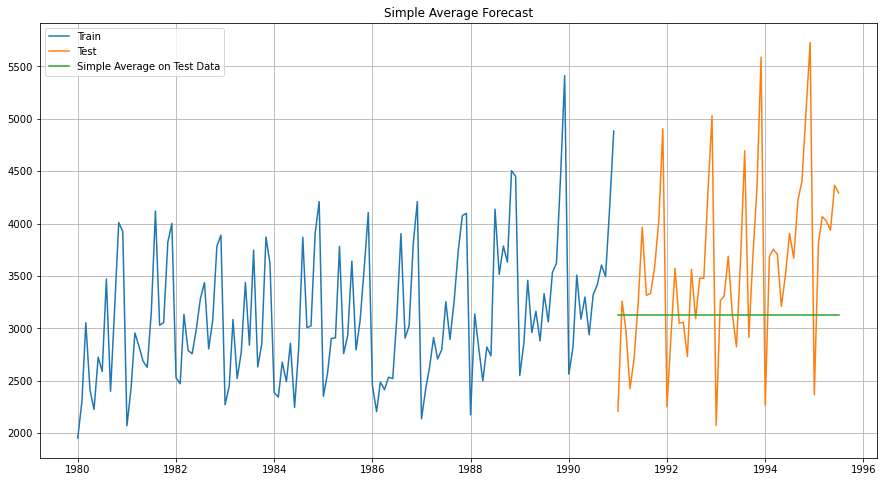

In [70]:
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [71]:
rmse_model3_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 934.353


In [72]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Alpha = 0.09 : SES                                   809.501640
Alpha = 1.49e-8, Beta = 1.66e-10 : DES              1074.329153
Alpha = 0.08, Beta = 0.0002, Gamma = 0.003 : TE...   458.965392
Alpha = 0.07, Beta = 0.04, Gamma = 7.24e-5 : TE...   447.722581
Regression Model                                     775.807810
Naive Model                                         1519.259233
Simple Average Model                                 934.353358

## Q2.5) Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [73]:
from statsmodels.tsa.stattools import adfuller

In [74]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.649
DF test p-value is 0.7726647141271693
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [75]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.271
DF test p-value is 3.4205181049970745e-09
Number of lags used 11


Now, let us go ahead and plot the stationary series.

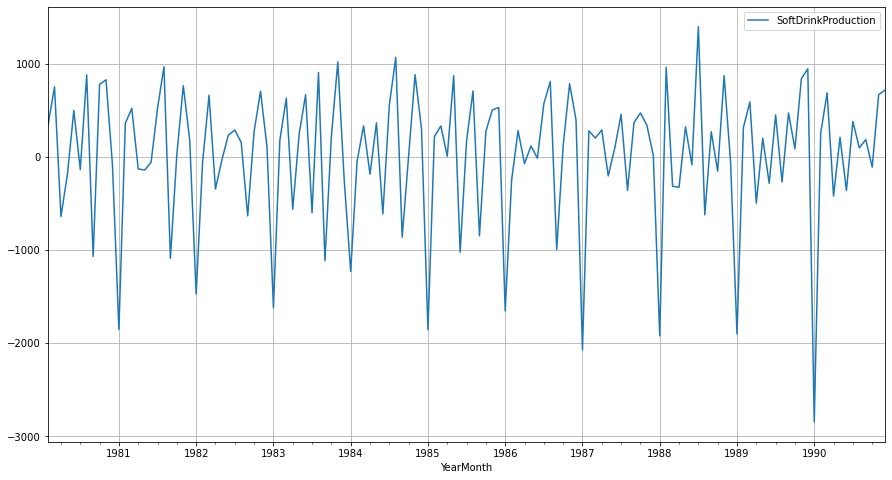

In [76]:
train.diff().dropna().plot(grid=True);

## Q2.6) Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

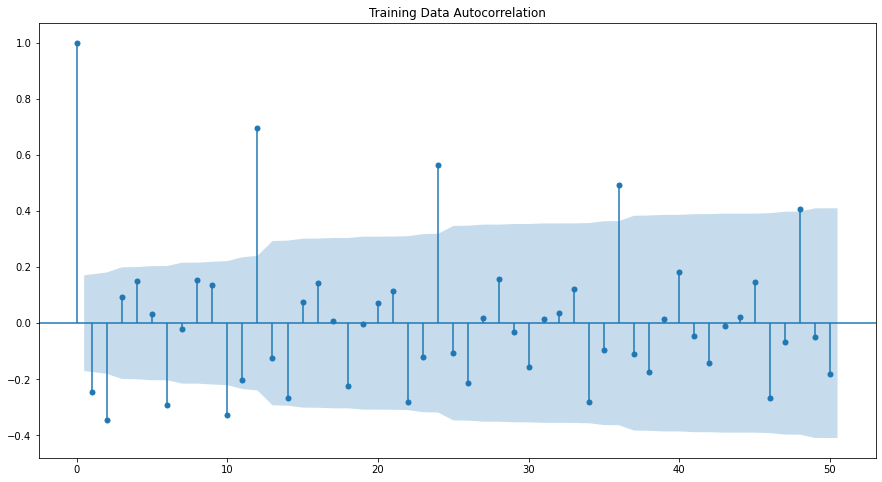

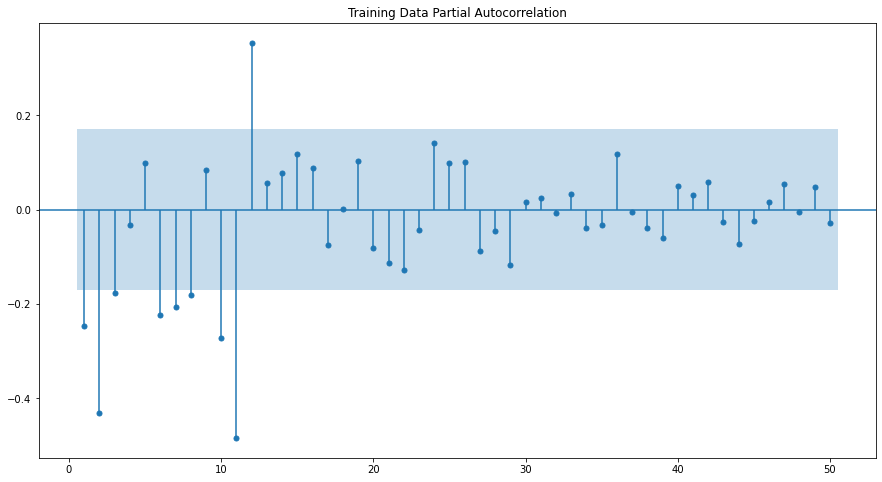

In [78]:
plot_acf(train.diff(),lags=50,title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),lags=50,title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [79]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [80]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [81]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1836.220093770634
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1633.5491793653584


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:7238.374258868038
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1789.866280699666
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1764.6107238899458
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1591.515574448134


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4493.836684386619
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1608.648860364038
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1608.6165283979685
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1591.8014039553793
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3696.7621378711033
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1431.8195214429534
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1433.6836345123588
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1435.6483733035402
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3004.361880572303
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2035.4871783907797
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1788.5369694843512
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1577.0183750522465


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3413.3145618911403
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1749.9824755850375
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1697.7997311037427
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1530.6914315588915


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3797.5709053517767
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1563.4637994171042
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1558.212075380079
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1529.2536659271666
SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3806.5967891705272
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1391.5159313903753
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1391.6784806925327
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1393.2542235818532


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3469.9717891132896
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2008.7530085409544
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1762.373496354795
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1560.8259136546703


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:422.7699605744782
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1744.3330844654236
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1684.985714927209
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1518.229380681697
SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3808.93407631908
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1564.2964670213519
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1559.4022470471843
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1517.2079034686603


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:5454.103905121423
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1392.0923895475999
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1392.8896915995124
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1394.6785440386193


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3166.8333326775296
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1992.4491478146253
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1749.3536183808367
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1548.9937425992944
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:1336.963775226589
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1746.2493017244767
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1673.776856189469
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1506.742220364156


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:4338.904832955979
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1566.2019205396878
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1561.294241706936
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1505.635099332347


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3619.967947078202
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1394.04615166351
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1394.8217249940715
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1396.619517197585


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:1525.7176917292222
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2082.346293203914
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1830.7959380862144
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1619.1692193103256


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:6664.396221686005
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1762.6869226701047
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1746.034454857006
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1573.3986023937075
SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3350.437690188682
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1575.3766146707294
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1574.304375393354
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1572.7118411383676


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3693.818702062447
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1403.906279089637
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1404.8772929444274
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1405.6815276344494


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:4328.652432115999
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2026.5294817471072
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1779.6139226873577
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1575.120060961835


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:12.0
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1730.6597849506484
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1699.1731081149385
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1531.8683338023518
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3850.18335975827
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1546.3906446336277
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1544.971326798256
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1530.656752010626


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3719.6164202226682
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1378.1108268698042
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1379.410864119936
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1381.116185865422
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3408.1182494302784
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2006.746227636616
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1763.7570444978153
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1561.8450000930738


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:7068.88490575002
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1734.417758433206
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1686.9458103335023
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1519.1970117049343


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3694.0167111670144
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1548.2807766792212
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1546.50027592403
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1518.3289766468095
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3796.5075803943473
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1379.4891002178856
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1380.6334398341378
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1382.1718102070183


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3108.7185955710697
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1993.7636079594597
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1751.197671186394
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1548.7659339348165


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:2789.1564120759376
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1734.045301341919
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1675.756133289186
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1507.6931783560206


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3594.679827620068
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1550.2325958708093
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1548.814055830833
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1506.58361766345


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3246.7008799901582
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1381.4552171271007
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1382.6330750405052
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1384.1703875750072


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2429.276468538227
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2040.0704103507978
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1814.15834820275
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1607.689201397332


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:6599.142208729196
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1738.2500720137982
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1717.8744470685563
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1561.9021353051871


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:4087.9680278462165
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1547.9158672872265
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1546.9578751839003
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1546.8665186646467


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:4129.01264764033
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1378.7471567466857
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1379.6405722425325
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1380.8247104371728


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:4423.767897088094
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2024.4456626384836
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1778.676297489923
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1577.0337158746495


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:14.0
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1717.9115930413
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1700.7853241224186
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1533.792241928349


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3813.7662268802083
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1534.5085119806383
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1533.0523656749233
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1532.6514998886628
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:5033.503434742408
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1366.4702945429144
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1367.791404116008
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1369.5244212141688


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3767.210789853001
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2008.4721966059778
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1765.3249455639093
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1565.423255533412


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:171.50040332457377
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1717.5426781071876
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1688.8418446983376
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1521.191004722104


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3246.469781502852
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1535.938854322712
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1534.024085904256
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1520.313656799483


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3949.7325048491316
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1367.7234168172547
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1369.0617762575253
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1370.6028264630775


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:125.724211086664
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1992.3012525269858
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1752.3850967581045
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1550.3287493471435
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:6986.031044557867
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1721.4395386181047
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1675.8823161756568
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1507.303534070244


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3428.637646823555
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1536.820407318306
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1535.9951831181957
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1504.7079983103872


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:2699.431218080885
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1365.5494742654378
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1367.6675889905578
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1369.1564270085396


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3477.828868190569
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2022.4138558163286
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1812.4013182248864
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1605.2419625143723


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:7215.596302738822
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1719.744395849598
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1698.4787581851815
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1558.483268784333


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3660.945831816146
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1529.361512884088
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1528.7958279745296
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1529.288632722135


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3900.104448988129
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1361.0088098540336
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1362.4041811618229
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1363.9926701714464


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3421.6534670028755
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2007.4611617783607
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1780.1012202741279
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1578.5247711729305


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:7141.715886535205
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1705.3828857726191
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1688.493140679405
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1535.5165931843628


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:4175.673220792142
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1522.015461996519
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1520.9548938798735
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1520.767414295734


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3490.5919663120885
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1354.2469242830105
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1355.6420787136635
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1357.2774013176895


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:22.0
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2009.452887591562
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1768.6803026858058
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1564.7538815897183
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:7917.943765234772
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1707.0364910726194
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1689.8221378494904
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1522.917095591788


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:2894.6801500519614
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1523.9294296189669
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1522.2640779939165
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1521.8279643008768
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3434.4702026510786
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1355.7661419038545
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1357.1145371377702
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1358.507109521614


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3871.999668227792
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1975.5866510437054
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1753.475870435545
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1551.6743552050334


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:6987.814693088552
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1709.27008413564
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1677.801294541161
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1510.2428027872907


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3898.0129413577993
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1526.8629573206201
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1522.627405359036
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1509.1150210313215


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3467.0645860386358
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1350.3159997313371
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1356.7865806877692
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1356.6622652441981
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2794.3446248697114


C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [82]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
83   (1, 1, 1)  (0, 0, 3, 12)   12.000000
147  (2, 1, 1)  (0, 0, 3, 12)   14.000000
223  (3, 1, 1)  (3, 0, 3, 12)   22.000000
175  (2, 1, 2)  (3, 0, 3, 12)  125.724211
163  (2, 1, 2)  (0, 0, 3, 12)  171.500403

In [83]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                     SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -668.639
Date:                                 Thu, 16 Jun 2022   AIC                           1357.277
Time:                                         13:50:50   BIC                           1382.495
Sample:                                     01-01-1980   HQIC                          1367.456
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1000      0.143      0.701      0.483      -0.180       0

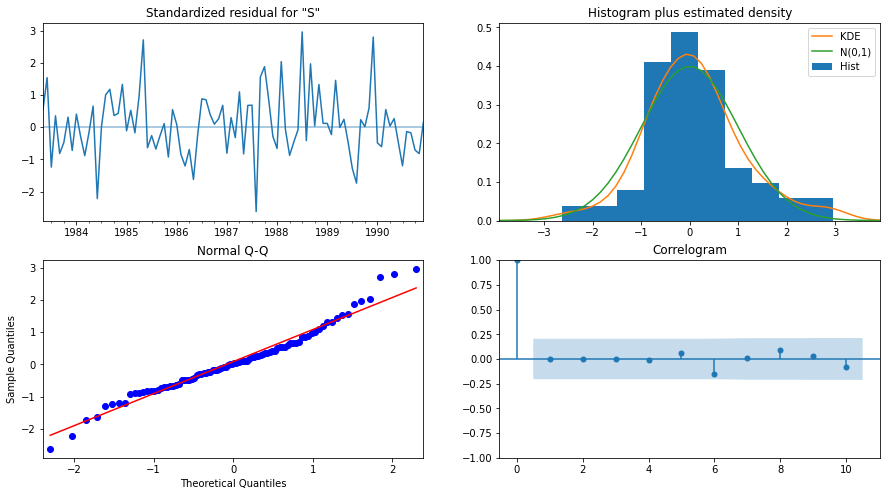

In [84]:
results_auto_SARIMA.plot_diagnostics();

In [85]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [86]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

SoftDrinkProduction         mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01           2620.292518  342.826922    1948.364098    3292.220937
1991-02-01           2987.170900  348.255465    2304.602731    3669.739070
1991-03-01           3404.445278  349.092581    2720.236391    4088.654165
1991-04-01           3066.759701  353.308874    2374.287033    3759.232369
1991-05-01           3270.283968  355.193181    2574.118125    3966.449811

In [87]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [88]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 427.63406007717424 
MAPE: 10.875732384235762


In [89]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA_Auto(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Alpha = 0.09 : SES                                   809.501640
Alpha = 1.49e-8, Beta = 1.66e-10 : DES              1074.329153
Alpha = 0.08, Beta = 0.0002, Gamma = 0.003 : TE...   458.965392
Alpha = 0.07, Beta = 0.04, Gamma = 7.24e-5 : TE...   447.722581
Regression Model                                     775.807810
Naive Model                                         1519.259233
Simple Average Model                                 934.353358
SARIMA_Auto(3,1,1)(3,0,2,12)                         427.634060

## Q2.7) Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

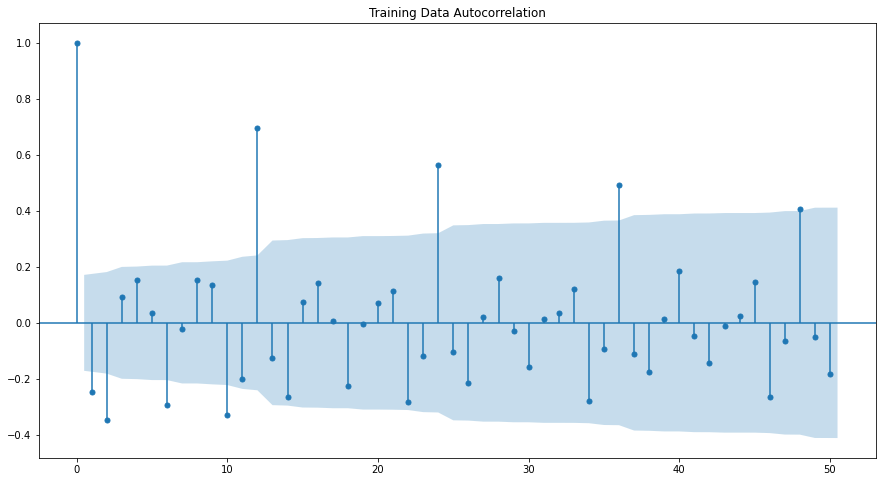

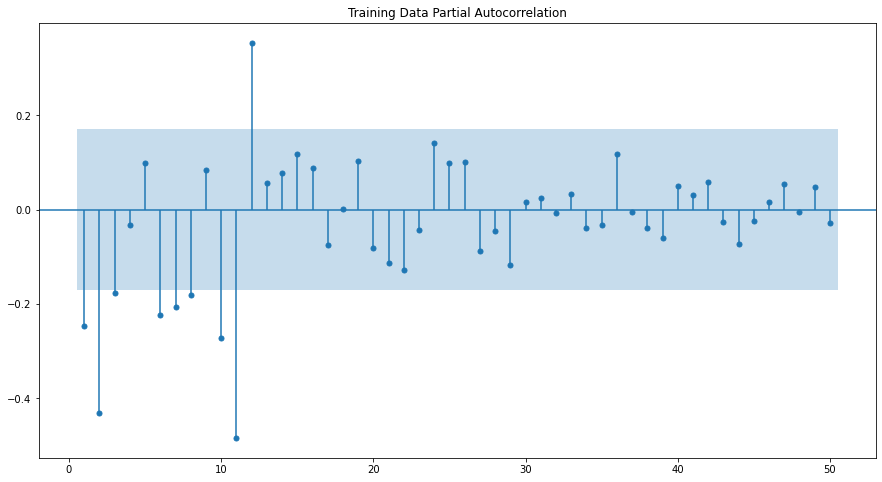

In [90]:
plot_acf(train.diff().dropna(),lags=50,title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),lags=50,title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [93]:
import statsmodels.api as sm

In [94]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(2,1,2),
                                seasonal_order=(0, 1, 12, 24),
                                #enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                                        SARIMAX Results                                                         
Dep. Variable:                                                      SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(0, 1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 24)   Log Likelihood                -785.897
Date:                                                                  Thu, 16 Jun 2022   AIC                           1605.794
Time:                                                                          14:42:28   BIC                           1651.232
Sample:                                                                      01-01-1980   HQIC                          1624.214
                                                                           - 12-01-1990                                         
Covariance Type:                                                                    opg          

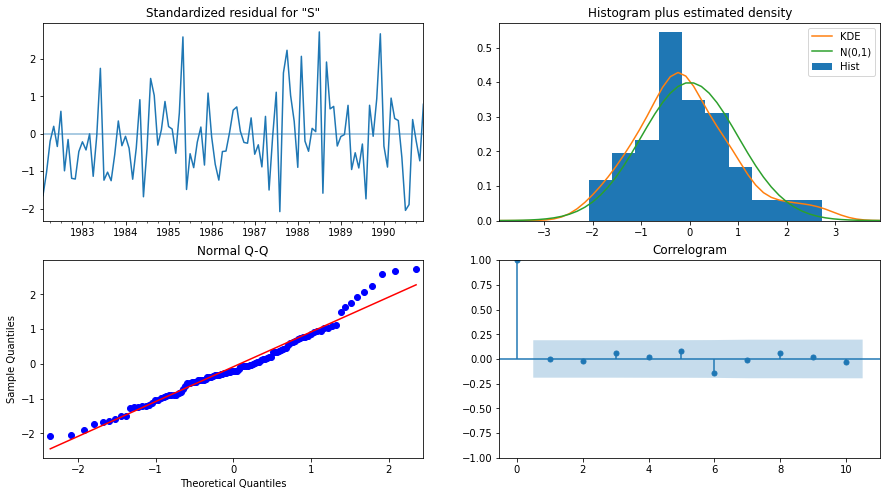

In [95]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [96]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [97]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 608.0069198004215 
MAPE: 13.222030959955845


In [98]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA_Manual(2,1,2)(0,1,12,24)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Alpha = 0.09 : SES                                   809.501640
Alpha = 1.49e-8, Beta = 1.66e-10 : DES              1074.329153
Alpha = 0.08, Beta = 0.0002, Gamma = 0.003 : TE...   458.965392
Alpha = 0.07, Beta = 0.04, Gamma = 7.24e-5 : TE...   447.722581
Regression Model                                     775.807810
Naive Model                                         1519.259233
Simple Average Model                                 934.353358
SARIMA_Auto(3,1,1)(3,0,2,12)                         427.634060
SARIMA_Manual(2,1,2)(0,1,12,24)                      608.006920

## Q2.8) Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [99]:
resultsDf

Test RMSE
Alpha = 0.09 : SES                                   809.501640
Alpha = 1.49e-8, Beta = 1.66e-10 : DES              1074.329153
Alpha = 0.08, Beta = 0.0002, Gamma = 0.003 : TE...   458.965392
Alpha = 0.07, Beta = 0.04, Gamma = 7.24e-5 : TE...   447.722581
Regression Model                                     775.807810
Naive Model                                         1519.259233
Simple Average Model                                 934.353358
SARIMA_Auto(3,1,1)(3,0,2,12)                         427.634060
SARIMA_Manual(2,1,2)(0,1,12,24)                      608.006920

## Q2.9) Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [100]:
full_data_model = ExponentialSmoothing(df,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
full_data_model = full_data_model.fit()

print('')
print('== Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(full_data_model.params)

C:\Users\sankesh nagrare\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



== Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11238627876980502, 'smoothing_trend': 0.08744849128598821, 'smoothing_seasonal': 0.296746510658254, 'damping_trend': nan, 'initial_level': 2802.9504126041684, 'initial_trend': 12.129001433987412, 'initial_seasons': array([-687.4529647 , -582.75987466,  -55.45060893, -365.70168671,
       -253.53771449, -196.42589555,  -32.66701439,  690.26106557,
       -282.32490047,   44.77261006,  867.39344232,  853.63543195]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [101]:
final_predict =  full_data_model.forecast(steps=12)
final_predict

1995-08-01    4467.719196
1995-09-01    4347.291855
1995-10-01    4624.789131
1995-11-01    5323.722366
1995-12-01    6095.999319
1996-01-01    3129.375570
1996-02-01    4291.321520
1996-03-01    4502.889277
1996-04-01    4399.750940
1996-05-01    4241.096516
1996-06-01    4372.374634
1996-07-01    4820.330793
Freq: MS, dtype: float64

In [102]:
rmse = mean_squared_error(df['SoftDrinkProduction'],full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 332.3853901348161


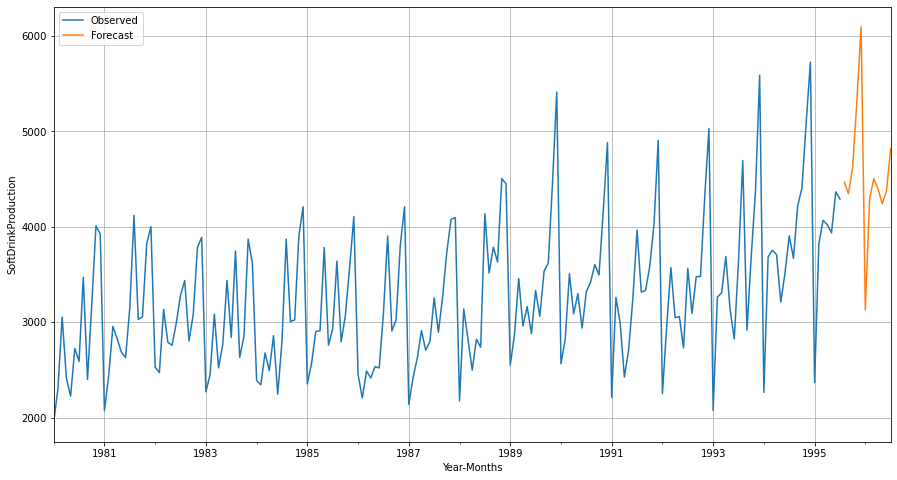

In [105]:
axis = df['SoftDrinkProduction'].plot(label='Observed')
final_predict.plot(ax=axis, label='Forecast')

axis.set_xlabel('Year-Months')
axis.set_ylabel('SoftDrinkProduction')
plt.legend(loc='best')
plt.grid();

# THE END